# RR感覚のデータからHRVパラメータを計算するプログラム

In [118]:
import sys
sys.path.append('..')
from Constants import Constants

import heartpy as hp
import pandas as pd

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import glob
import re

In [119]:
# 正規表現でなんとでもなる
# /Users/miyakooti/repositories/arai_MATLAB_program/csv/5_toki/PLIdata
pathes = glob.glob("/Users/miyakooti/repositories/arai_MATLAB_program/csv/*_*/PLIdata/PLI_*.csv")
pathes = sorted(pathes)
pathes

['/Users/miyakooti/repositories/arai_MATLAB_program/csv/0_kumakura/PLIdata/PLI_0_kumakura_rest.csv',
 '/Users/miyakooti/repositories/arai_MATLAB_program/csv/0_kumakura/PLIdata/PLI_1_kumakura_practice.csv',
 '/Users/miyakooti/repositories/arai_MATLAB_program/csv/0_kumakura/PLIdata/PLI_2_kumakura_boredom.csv',
 '/Users/miyakooti/repositories/arai_MATLAB_program/csv/0_kumakura/PLIdata/PLI_3_kumakura_flow.csv',
 '/Users/miyakooti/repositories/arai_MATLAB_program/csv/0_kumakura/PLIdata/PLI_4_kumakura_flow_ultra.csv',
 '/Users/miyakooti/repositories/arai_MATLAB_program/csv/0_kumakura/PLIdata/PLI_4_kumakura_ultra.csv',
 '/Users/miyakooti/repositories/arai_MATLAB_program/csv/0_kumakura/PLIdata/PLI_5_kumakura_overload.csv',
 '/Users/miyakooti/repositories/arai_MATLAB_program/csv/10_tenshin/PLIdata/PLI_0_tenshin_rest.csv',
 '/Users/miyakooti/repositories/arai_MATLAB_program/csv/10_tenshin/PLIdata/PLI_2_tenshin_boredom.csv',
 '/Users/miyakooti/repositories/arai_MATLAB_program/csv/10_tenshin/PLIda

In [120]:
target_phase = ["rest", "boredom", "flow", "overload"]

In [121]:
data = {"lf": [], "FCz": []}
dataset = pd.DataFrame(data)

for i, subject_name in enumerate(Constants.subject_name_list):
    
    for phase_name in target_phase:
        
        hrdata = hp.get_data(f"{Constants.path_to_matlab_repository_folder}/csv/{i}_{subject_name}/ECG/ECG_{subject_name}_{phase_name}.csv", delim = ",", column_name = "ECG")
        
        pathes = glob.glob(f"{Constants.path_to_matlab_repository_folder}/csv/{i}_{subject_name}/PLIdata/PLI_*_{subject_name}_{phase_name}.csv")
        
        if len(pathes) == 0:
            continue
            
        PLI_data_path = pathes[0]
        print(PLI_data_path)
        
        save_path = f'{Constants.path_to_matlab_repository_folder}/csv/{i}_{subject_name}/ECG/{subject_name}_HRV.csv'
        
        print(f"{Constants.path_to_matlab_repository_folder}/csv/{i}_{subject_name}/ECG/ECG_{subject_name}_{phase_name}.csv")
        
        # 心電図が逆向きになってしまっていたので、特例措置
        if subject_name == "kim":
            hrdata = hrdata*(-1)
        
        # debug-print -----------------------------------------------------------------
        
        print(f"{subject_name} さんの {phase_name} フェーズのデータを分析します。")
        sec = len(hrdata)/500
        print(f"計測時間は{sec}秒です")
        
        # / ---------------------------------------------------------------------------
        
        
        
        PLI_df = pd.read_csv(f"{PLI_data_path}")
        
        # 120秒てこと
        window = 120 * 500

        # 1つのデータに対して3回計算、addする
        for _ in range(3):
            
            
            #0
            hrdata1 = hrdata[0: window+1]
            working_data, measures = hp.process(hrdata1, Constants.fs, report_time=True, calc_freq=True)
            
            lf = measures["lf"]    
            # 120行目のFCzの値を取得する
            FCz_value = PLI_df.loc[60, 'FCz']
            
            new_row = {"lf": lf, "FCz": FCz_value}
            dataset = dataset.append(new_row, ignore_index=True)
            
            
            
                    
            #1
            hrdata1 = hrdata[60: window+61]
            working_data, measures = hp.process(hrdata1, Constants.fs, report_time=True, calc_freq=True)
            
            lf = measures["lf"]    
            # 120行目のFCzの値を取得する
            FCz_value = PLI_df.loc[120, 'FCz']
            
            new_row = {"lf": lf, "FCz": FCz_value}
            dataset = dataset.append(new_row, ignore_index=True)
            
            

            
            
            
            
            #2
            hrdata1 = hrdata[120: window+121]
            working_data, measures = hp.process(hrdata1, Constants.fs, report_time=True, calc_freq=True)
            
            lf = measures["lf"]    
            # 180行目のFCzの値を取得する
            FCz_value = PLI_df.loc[180, 'FCz']
            
            new_row = {"lf": lf, "FCz": FCz_value}
            dataset = dataset.append(new_row, ignore_index=True)
            
            #3
            hrdata1 = hrdata[180: window+181]
            working_data, measures = hp.process(hrdata1, Constants.fs, report_time=True, calc_freq=True)
            
            lf = measures["lf"]    
            # 120行目のFCzの値を取得する
            FCz_value = PLI_df.loc[240, 'FCz']
            
            new_row = {"lf": lf, "FCz": FCz_value}
            dataset = dataset.append(new_row, ignore_index=True)
            
            
            
            


        




/Users/miyakooti/repositories/arai_MATLAB_program/csv/0_kumakura/PLIdata/PLI_0_kumakura_rest.csv
/Users/miyakooti/repositories/arai_MATLAB_program/csv/0_kumakura/ECG/ECG_kumakura_rest.csv
kumakura さんの rest フェーズのデータを分析します。
計測時間は312.716秒です

Finished in 0.040575 sec

Finished in 0.028294 sec

Finished in 0.028374 sec

Finished in 0.027238 sec

Finished in 0.027220 sec

Finished in 0.027581 sec


/Users/miyakooti/opt/anaconda3/lib/python3.9/site-packages/heartpy-1.2.7-py3.9.egg/heartpy/analysis.py:528: UserWarning: Short signal.

---------Warning:---------
too few peak-peak intervals for (reliable) frequency domain measure computation, frequency output measures are still computed but treat them with caution!

HF is usually computed over a minimum of 1 minute of good signal. LF is usually computed over a minimum of 2 minutes of good signal.VLF is usually computed over a minimum of 5 minutes of good signal.The LF/HF ratio is usually computed over minimum 24 hours, although an absolute minimum of 5 min has also been suggested.

For more info see: 
Shaffer, F., Ginsberg, J.P. (2017), An Overview of Heart Rate Variability Metrics and Norms.

Task Force of Pacing and Electrophysiology (1996), Heart Rate Variability, in: European Heart Journal, vol.17, issue 3, pp354-381

This warning will not repeat
/var/folders/4_/zl9w1kqn3wj4cv0147kh6bc40000gn/T/ipykernel_40560/2667269074.py:54: Fu


Finished in 0.029660 sec

Finished in 0.035480 sec

Finished in 0.036200 sec

Finished in 0.033609 sec

Finished in 0.039573 sec

Finished in 0.030995 sec


/Users/miyakooti/opt/anaconda3/lib/python3.9/site-packages/heartpy-1.2.7-py3.9.egg/heartpy/analysis.py:528: UserWarning: Short signal.

---------Warning:---------
too few peak-peak intervals for (reliable) frequency domain measure computation, frequency output measures are still computed but treat them with caution!

HF is usually computed over a minimum of 1 minute of good signal. LF is usually computed over a minimum of 2 minutes of good signal.VLF is usually computed over a minimum of 5 minutes of good signal.The LF/HF ratio is usually computed over minimum 24 hours, although an absolute minimum of 5 min has also been suggested.

For more info see: 
Shaffer, F., Ginsberg, J.P. (2017), An Overview of Heart Rate Variability Metrics and Norms.

Task Force of Pacing and Electrophysiology (1996), Heart Rate Variability, in: European Heart Journal, vol.17, issue 3, pp354-381

This warning will not repeat
/var/folders/4_/zl9w1kqn3wj4cv0147kh6bc40000gn/T/ipykernel_40560/2667269074.py:96: Fu

/Users/miyakooti/repositories/arai_MATLAB_program/csv/0_kumakura/PLIdata/PLI_2_kumakura_boredom.csv
/Users/miyakooti/repositories/arai_MATLAB_program/csv/0_kumakura/ECG/ECG_kumakura_boredom.csv
kumakura さんの boredom フェーズのデータを分析します。
計測時間は319.402秒です

Finished in 0.035145 sec

Finished in 0.029388 sec

Finished in 0.029276 sec

Finished in 0.033124 sec

Finished in 0.042478 sec


/Users/miyakooti/opt/anaconda3/lib/python3.9/site-packages/heartpy-1.2.7-py3.9.egg/heartpy/analysis.py:528: UserWarning: Short signal.

---------Warning:---------
too few peak-peak intervals for (reliable) frequency domain measure computation, frequency output measures are still computed but treat them with caution!

HF is usually computed over a minimum of 1 minute of good signal. LF is usually computed over a minimum of 2 minutes of good signal.VLF is usually computed over a minimum of 5 minutes of good signal.The LF/HF ratio is usually computed over minimum 24 hours, although an absolute minimum of 5 min has also been suggested.

For more info see: 
Shaffer, F., Ginsberg, J.P. (2017), An Overview of Heart Rate Variability Metrics and Norms.

Task Force of Pacing and Electrophysiology (1996), Heart Rate Variability, in: European Heart Journal, vol.17, issue 3, pp354-381

This warning will not repeat
/var/folders/4_/zl9w1kqn3wj4cv0147kh6bc40000gn/T/ipykernel_40560/2667269074.py:54: Fu


Finished in 0.035138 sec

Finished in 0.032858 sec

Finished in 0.030010 sec

Finished in 0.029224 sec

Finished in 0.028497 sec

Finished in 0.031477 sec

Finished in 0.032702 sec


/Users/miyakooti/opt/anaconda3/lib/python3.9/site-packages/heartpy-1.2.7-py3.9.egg/heartpy/analysis.py:528: UserWarning: Short signal.

---------Warning:---------
too few peak-peak intervals for (reliable) frequency domain measure computation, frequency output measures are still computed but treat them with caution!

HF is usually computed over a minimum of 1 minute of good signal. LF is usually computed over a minimum of 2 minutes of good signal.VLF is usually computed over a minimum of 5 minutes of good signal.The LF/HF ratio is usually computed over minimum 24 hours, although an absolute minimum of 5 min has also been suggested.

For more info see: 
Shaffer, F., Ginsberg, J.P. (2017), An Overview of Heart Rate Variability Metrics and Norms.

Task Force of Pacing and Electrophysiology (1996), Heart Rate Variability, in: European Heart Journal, vol.17, issue 3, pp354-381

This warning will not repeat
/var/folders/4_/zl9w1kqn3wj4cv0147kh6bc40000gn/T/ipykernel_40560/2667269074.py:85: Fu

/Users/miyakooti/repositories/arai_MATLAB_program/csv/0_kumakura/PLIdata/PLI_3_kumakura_flow.csv
/Users/miyakooti/repositories/arai_MATLAB_program/csv/0_kumakura/ECG/ECG_kumakura_flow.csv
kumakura さんの flow フェーズのデータを分析します。
計測時間は606.986秒です

Finished in 0.030431 sec

Finished in 0.030497 sec

Finished in 0.030023 sec

Finished in 0.030328 sec

Finished in 0.029292 sec

Finished in 0.030105 sec


/Users/miyakooti/opt/anaconda3/lib/python3.9/site-packages/heartpy-1.2.7-py3.9.egg/heartpy/analysis.py:528: UserWarning: Short signal.

---------Warning:---------
too few peak-peak intervals for (reliable) frequency domain measure computation, frequency output measures are still computed but treat them with caution!

HF is usually computed over a minimum of 1 minute of good signal. LF is usually computed over a minimum of 2 minutes of good signal.VLF is usually computed over a minimum of 5 minutes of good signal.The LF/HF ratio is usually computed over minimum 24 hours, although an absolute minimum of 5 min has also been suggested.

For more info see: 
Shaffer, F., Ginsberg, J.P. (2017), An Overview of Heart Rate Variability Metrics and Norms.

Task Force of Pacing and Electrophysiology (1996), Heart Rate Variability, in: European Heart Journal, vol.17, issue 3, pp354-381

This warning will not repeat
/var/folders/4_/zl9w1kqn3wj4cv0147kh6bc40000gn/T/ipykernel_40560/2667269074.py:54: Fu


Finished in 0.030549 sec

Finished in 0.031097 sec

Finished in 0.030875 sec

Finished in 0.033303 sec

Finished in 0.029790 sec

Finished in 0.030296 sec


/Users/miyakooti/opt/anaconda3/lib/python3.9/site-packages/heartpy-1.2.7-py3.9.egg/heartpy/analysis.py:528: UserWarning: Short signal.

---------Warning:---------
too few peak-peak intervals for (reliable) frequency domain measure computation, frequency output measures are still computed but treat them with caution!

HF is usually computed over a minimum of 1 minute of good signal. LF is usually computed over a minimum of 2 minutes of good signal.VLF is usually computed over a minimum of 5 minutes of good signal.The LF/HF ratio is usually computed over minimum 24 hours, although an absolute minimum of 5 min has also been suggested.

For more info see: 
Shaffer, F., Ginsberg, J.P. (2017), An Overview of Heart Rate Variability Metrics and Norms.

Task Force of Pacing and Electrophysiology (1996), Heart Rate Variability, in: European Heart Journal, vol.17, issue 3, pp354-381

This warning will not repeat
/var/folders/4_/zl9w1kqn3wj4cv0147kh6bc40000gn/T/ipykernel_40560/2667269074.py:96: Fu

/Users/miyakooti/repositories/arai_MATLAB_program/csv/0_kumakura/PLIdata/PLI_5_kumakura_overload.csv
/Users/miyakooti/repositories/arai_MATLAB_program/csv/0_kumakura/ECG/ECG_kumakura_overload.csv
kumakura さんの overload フェーズのデータを分析します。
計測時間は324.99秒です

Finished in 0.030507 sec

Finished in 0.028760 sec

Finished in 0.028734 sec

Finished in 0.029404 sec

Finished in 0.028985 sec

Finished in 0.028334 sec


/Users/miyakooti/opt/anaconda3/lib/python3.9/site-packages/heartpy-1.2.7-py3.9.egg/heartpy/analysis.py:528: UserWarning: Short signal.

---------Warning:---------
too few peak-peak intervals for (reliable) frequency domain measure computation, frequency output measures are still computed but treat them with caution!

HF is usually computed over a minimum of 1 minute of good signal. LF is usually computed over a minimum of 2 minutes of good signal.VLF is usually computed over a minimum of 5 minutes of good signal.The LF/HF ratio is usually computed over minimum 24 hours, although an absolute minimum of 5 min has also been suggested.

For more info see: 
Shaffer, F., Ginsberg, J.P. (2017), An Overview of Heart Rate Variability Metrics and Norms.

Task Force of Pacing and Electrophysiology (1996), Heart Rate Variability, in: European Heart Journal, vol.17, issue 3, pp354-381

This warning will not repeat
/var/folders/4_/zl9w1kqn3wj4cv0147kh6bc40000gn/T/ipykernel_40560/2667269074.py:54: Fu


Finished in 0.029034 sec

Finished in 0.030549 sec

Finished in 0.029759 sec

Finished in 0.028701 sec

Finished in 0.028670 sec

Finished in 0.029079 sec


/Users/miyakooti/opt/anaconda3/lib/python3.9/site-packages/heartpy-1.2.7-py3.9.egg/heartpy/analysis.py:528: UserWarning: Short signal.

---------Warning:---------
too few peak-peak intervals for (reliable) frequency domain measure computation, frequency output measures are still computed but treat them with caution!

HF is usually computed over a minimum of 1 minute of good signal. LF is usually computed over a minimum of 2 minutes of good signal.VLF is usually computed over a minimum of 5 minutes of good signal.The LF/HF ratio is usually computed over minimum 24 hours, although an absolute minimum of 5 min has also been suggested.

For more info see: 
Shaffer, F., Ginsberg, J.P. (2017), An Overview of Heart Rate Variability Metrics and Norms.

Task Force of Pacing and Electrophysiology (1996), Heart Rate Variability, in: European Heart Journal, vol.17, issue 3, pp354-381

This warning will not repeat
/var/folders/4_/zl9w1kqn3wj4cv0147kh6bc40000gn/T/ipykernel_40560/2667269074.py:96: Fu

/Users/miyakooti/repositories/arai_MATLAB_program/csv/1_kim/PLIdata/PLI_0_kim_rest.csv
/Users/miyakooti/repositories/arai_MATLAB_program/csv/1_kim/ECG/ECG_kim_rest.csv
kim さんの rest フェーズのデータを分析します。
計測時間は314.558秒です

Finished in 0.026175 sec

Finished in 0.025266 sec

Finished in 0.025403 sec

Finished in 0.025193 sec

Finished in 0.025711 sec

Finished in 0.025141 sec

Finished in 0.024897 sec


/Users/miyakooti/opt/anaconda3/lib/python3.9/site-packages/heartpy-1.2.7-py3.9.egg/heartpy/analysis.py:528: UserWarning: Short signal.

---------Warning:---------
too few peak-peak intervals for (reliable) frequency domain measure computation, frequency output measures are still computed but treat them with caution!

HF is usually computed over a minimum of 1 minute of good signal. LF is usually computed over a minimum of 2 minutes of good signal.VLF is usually computed over a minimum of 5 minutes of good signal.The LF/HF ratio is usually computed over minimum 24 hours, although an absolute minimum of 5 min has also been suggested.

For more info see: 
Shaffer, F., Ginsberg, J.P. (2017), An Overview of Heart Rate Variability Metrics and Norms.

Task Force of Pacing and Electrophysiology (1996), Heart Rate Variability, in: European Heart Journal, vol.17, issue 3, pp354-381

This warning will not repeat
/var/folders/4_/zl9w1kqn3wj4cv0147kh6bc40000gn/T/ipykernel_40560/2667269074.py:54: Fu


Finished in 0.024997 sec

Finished in 0.025617 sec

Finished in 0.025821 sec

Finished in 0.025122 sec

Finished in 0.025419 sec


/Users/miyakooti/opt/anaconda3/lib/python3.9/site-packages/heartpy-1.2.7-py3.9.egg/heartpy/analysis.py:528: UserWarning: Short signal.

---------Warning:---------
too few peak-peak intervals for (reliable) frequency domain measure computation, frequency output measures are still computed but treat them with caution!

HF is usually computed over a minimum of 1 minute of good signal. LF is usually computed over a minimum of 2 minutes of good signal.VLF is usually computed over a minimum of 5 minutes of good signal.The LF/HF ratio is usually computed over minimum 24 hours, although an absolute minimum of 5 min has also been suggested.

For more info see: 
Shaffer, F., Ginsberg, J.P. (2017), An Overview of Heart Rate Variability Metrics and Norms.

Task Force of Pacing and Electrophysiology (1996), Heart Rate Variability, in: European Heart Journal, vol.17, issue 3, pp354-381

This warning will not repeat
/var/folders/4_/zl9w1kqn3wj4cv0147kh6bc40000gn/T/ipykernel_40560/2667269074.py:54: Fu

/Users/miyakooti/repositories/arai_MATLAB_program/csv/1_kim/PLIdata/PLI_2_kim_boredom.csv
/Users/miyakooti/repositories/arai_MATLAB_program/csv/1_kim/ECG/ECG_kim_boredom.csv
kim さんの boredom フェーズのデータを分析します。
計測時間は325.242秒です

Finished in 0.025128 sec

Finished in 0.025087 sec

Finished in 0.024007 sec

Finished in 0.024948 sec

Finished in 0.024048 sec

Finished in 0.023536 sec

Finished in 0.026226 sec


/Users/miyakooti/opt/anaconda3/lib/python3.9/site-packages/heartpy-1.2.7-py3.9.egg/heartpy/analysis.py:528: UserWarning: Short signal.

---------Warning:---------
too few peak-peak intervals for (reliable) frequency domain measure computation, frequency output measures are still computed but treat them with caution!

HF is usually computed over a minimum of 1 minute of good signal. LF is usually computed over a minimum of 2 minutes of good signal.VLF is usually computed over a minimum of 5 minutes of good signal.The LF/HF ratio is usually computed over minimum 24 hours, although an absolute minimum of 5 min has also been suggested.

For more info see: 
Shaffer, F., Ginsberg, J.P. (2017), An Overview of Heart Rate Variability Metrics and Norms.

Task Force of Pacing and Electrophysiology (1996), Heart Rate Variability, in: European Heart Journal, vol.17, issue 3, pp354-381

This warning will not repeat
/var/folders/4_/zl9w1kqn3wj4cv0147kh6bc40000gn/T/ipykernel_40560/2667269074.py:54: Fu


Finished in 0.025560 sec

Finished in 0.025728 sec

Finished in 0.024092 sec

Finished in 0.026868 sec

Finished in 0.024607 sec


/Users/miyakooti/opt/anaconda3/lib/python3.9/site-packages/heartpy-1.2.7-py3.9.egg/heartpy/analysis.py:528: UserWarning: Short signal.

---------Warning:---------
too few peak-peak intervals for (reliable) frequency domain measure computation, frequency output measures are still computed but treat them with caution!

HF is usually computed over a minimum of 1 minute of good signal. LF is usually computed over a minimum of 2 minutes of good signal.VLF is usually computed over a minimum of 5 minutes of good signal.The LF/HF ratio is usually computed over minimum 24 hours, although an absolute minimum of 5 min has also been suggested.

For more info see: 
Shaffer, F., Ginsberg, J.P. (2017), An Overview of Heart Rate Variability Metrics and Norms.

Task Force of Pacing and Electrophysiology (1996), Heart Rate Variability, in: European Heart Journal, vol.17, issue 3, pp354-381

This warning will not repeat
/var/folders/4_/zl9w1kqn3wj4cv0147kh6bc40000gn/T/ipykernel_40560/2667269074.py:54: Fu

/Users/miyakooti/repositories/arai_MATLAB_program/csv/1_kim/PLIdata/PLI_3_kim_flow.csv
/Users/miyakooti/repositories/arai_MATLAB_program/csv/1_kim/ECG/ECG_kim_flow.csv
kim さんの flow フェーズのデータを分析します。
計測時間は524.032秒です

Finished in 0.028721 sec

Finished in 0.027959 sec

Finished in 0.028881 sec

Finished in 0.028226 sec

Finished in 0.028326 sec

Finished in 0.027982 sec


/Users/miyakooti/opt/anaconda3/lib/python3.9/site-packages/heartpy-1.2.7-py3.9.egg/heartpy/analysis.py:528: UserWarning: Short signal.

---------Warning:---------
too few peak-peak intervals for (reliable) frequency domain measure computation, frequency output measures are still computed but treat them with caution!

HF is usually computed over a minimum of 1 minute of good signal. LF is usually computed over a minimum of 2 minutes of good signal.VLF is usually computed over a minimum of 5 minutes of good signal.The LF/HF ratio is usually computed over minimum 24 hours, although an absolute minimum of 5 min has also been suggested.

For more info see: 
Shaffer, F., Ginsberg, J.P. (2017), An Overview of Heart Rate Variability Metrics and Norms.

Task Force of Pacing and Electrophysiology (1996), Heart Rate Variability, in: European Heart Journal, vol.17, issue 3, pp354-381

This warning will not repeat
/var/folders/4_/zl9w1kqn3wj4cv0147kh6bc40000gn/T/ipykernel_40560/2667269074.py:54: Fu


Finished in 0.029646 sec

Finished in 0.028785 sec

Finished in 0.028305 sec

Finished in 0.028064 sec

Finished in 0.028977 sec

Finished in 0.028411 sec


/Users/miyakooti/opt/anaconda3/lib/python3.9/site-packages/heartpy-1.2.7-py3.9.egg/heartpy/analysis.py:528: UserWarning: Short signal.

---------Warning:---------
too few peak-peak intervals for (reliable) frequency domain measure computation, frequency output measures are still computed but treat them with caution!

HF is usually computed over a minimum of 1 minute of good signal. LF is usually computed over a minimum of 2 minutes of good signal.VLF is usually computed over a minimum of 5 minutes of good signal.The LF/HF ratio is usually computed over minimum 24 hours, although an absolute minimum of 5 min has also been suggested.

For more info see: 
Shaffer, F., Ginsberg, J.P. (2017), An Overview of Heart Rate Variability Metrics and Norms.

Task Force of Pacing and Electrophysiology (1996), Heart Rate Variability, in: European Heart Journal, vol.17, issue 3, pp354-381

This warning will not repeat
/var/folders/4_/zl9w1kqn3wj4cv0147kh6bc40000gn/T/ipykernel_40560/2667269074.py:96: Fu

/Users/miyakooti/repositories/arai_MATLAB_program/csv/1_kim/PLIdata/PLI_5_kim_overload.csv
/Users/miyakooti/repositories/arai_MATLAB_program/csv/1_kim/ECG/ECG_kim_overload.csv
kim さんの overload フェーズのデータを分析します。
計測時間は333.118秒です

Finished in 0.029022 sec

Finished in 0.027909 sec

Finished in 0.028491 sec

Finished in 0.028295 sec

Finished in 0.027672 sec

Finished in 0.028167 sec


/Users/miyakooti/opt/anaconda3/lib/python3.9/site-packages/heartpy-1.2.7-py3.9.egg/heartpy/analysis.py:528: UserWarning: Short signal.

---------Warning:---------
too few peak-peak intervals for (reliable) frequency domain measure computation, frequency output measures are still computed but treat them with caution!

HF is usually computed over a minimum of 1 minute of good signal. LF is usually computed over a minimum of 2 minutes of good signal.VLF is usually computed over a minimum of 5 minutes of good signal.The LF/HF ratio is usually computed over minimum 24 hours, although an absolute minimum of 5 min has also been suggested.

For more info see: 
Shaffer, F., Ginsberg, J.P. (2017), An Overview of Heart Rate Variability Metrics and Norms.

Task Force of Pacing and Electrophysiology (1996), Heart Rate Variability, in: European Heart Journal, vol.17, issue 3, pp354-381

This warning will not repeat
/var/folders/4_/zl9w1kqn3wj4cv0147kh6bc40000gn/T/ipykernel_40560/2667269074.py:54: Fu


Finished in 0.028655 sec

Finished in 0.030358 sec

Finished in 0.028435 sec

Finished in 0.027403 sec

Finished in 0.028178 sec

Finished in 0.028159 sec


/Users/miyakooti/opt/anaconda3/lib/python3.9/site-packages/heartpy-1.2.7-py3.9.egg/heartpy/analysis.py:528: UserWarning: Short signal.

---------Warning:---------
too few peak-peak intervals for (reliable) frequency domain measure computation, frequency output measures are still computed but treat them with caution!

HF is usually computed over a minimum of 1 minute of good signal. LF is usually computed over a minimum of 2 minutes of good signal.VLF is usually computed over a minimum of 5 minutes of good signal.The LF/HF ratio is usually computed over minimum 24 hours, although an absolute minimum of 5 min has also been suggested.

For more info see: 
Shaffer, F., Ginsberg, J.P. (2017), An Overview of Heart Rate Variability Metrics and Norms.

Task Force of Pacing and Electrophysiology (1996), Heart Rate Variability, in: European Heart Journal, vol.17, issue 3, pp354-381

This warning will not repeat
/var/folders/4_/zl9w1kqn3wj4cv0147kh6bc40000gn/T/ipykernel_40560/2667269074.py:96: Fu

/Users/miyakooti/repositories/arai_MATLAB_program/csv/2_souma/PLIdata/PLI_0_souma_rest.csv
/Users/miyakooti/repositories/arai_MATLAB_program/csv/2_souma/ECG/ECG_souma_rest.csv
souma さんの rest フェーズのデータを分析します。
計測時間は316.288秒です

Finished in 0.027055 sec

Finished in 0.026210 sec

Finished in 0.026257 sec

Finished in 0.025973 sec

Finished in 0.027387 sec

Finished in 0.026524 sec

Finished in 0.026559 sec


/Users/miyakooti/opt/anaconda3/lib/python3.9/site-packages/heartpy-1.2.7-py3.9.egg/heartpy/analysis.py:528: UserWarning: Short signal.

---------Warning:---------
too few peak-peak intervals for (reliable) frequency domain measure computation, frequency output measures are still computed but treat them with caution!

HF is usually computed over a minimum of 1 minute of good signal. LF is usually computed over a minimum of 2 minutes of good signal.VLF is usually computed over a minimum of 5 minutes of good signal.The LF/HF ratio is usually computed over minimum 24 hours, although an absolute minimum of 5 min has also been suggested.

For more info see: 
Shaffer, F., Ginsberg, J.P. (2017), An Overview of Heart Rate Variability Metrics and Norms.

Task Force of Pacing and Electrophysiology (1996), Heart Rate Variability, in: European Heart Journal, vol.17, issue 3, pp354-381

This warning will not repeat
/var/folders/4_/zl9w1kqn3wj4cv0147kh6bc40000gn/T/ipykernel_40560/2667269074.py:54: Fu


Finished in 0.028112 sec

Finished in 0.027360 sec

Finished in 0.027165 sec

Finished in 0.026267 sec

Finished in 0.026170 sec


/Users/miyakooti/opt/anaconda3/lib/python3.9/site-packages/heartpy-1.2.7-py3.9.egg/heartpy/analysis.py:528: UserWarning: Short signal.

---------Warning:---------
too few peak-peak intervals for (reliable) frequency domain measure computation, frequency output measures are still computed but treat them with caution!

HF is usually computed over a minimum of 1 minute of good signal. LF is usually computed over a minimum of 2 minutes of good signal.VLF is usually computed over a minimum of 5 minutes of good signal.The LF/HF ratio is usually computed over minimum 24 hours, although an absolute minimum of 5 min has also been suggested.

For more info see: 
Shaffer, F., Ginsberg, J.P. (2017), An Overview of Heart Rate Variability Metrics and Norms.

Task Force of Pacing and Electrophysiology (1996), Heart Rate Variability, in: European Heart Journal, vol.17, issue 3, pp354-381

This warning will not repeat
/var/folders/4_/zl9w1kqn3wj4cv0147kh6bc40000gn/T/ipykernel_40560/2667269074.py:54: Fu

/Users/miyakooti/repositories/arai_MATLAB_program/csv/2_souma/PLIdata/PLI_2_souma_boredom.csv
/Users/miyakooti/repositories/arai_MATLAB_program/csv/2_souma/ECG/ECG_souma_boredom.csv
souma さんの boredom フェーズのデータを分析します。
計測時間は324.226秒です

Finished in 0.027010 sec

Finished in 0.026160 sec

Finished in 0.026854 sec

Finished in 0.026110 sec

Finished in 0.025868 sec

Finished in 0.025786 sec

Finished in 0.026078 sec


/Users/miyakooti/opt/anaconda3/lib/python3.9/site-packages/heartpy-1.2.7-py3.9.egg/heartpy/analysis.py:528: UserWarning: Short signal.

---------Warning:---------
too few peak-peak intervals for (reliable) frequency domain measure computation, frequency output measures are still computed but treat them with caution!

HF is usually computed over a minimum of 1 minute of good signal. LF is usually computed over a minimum of 2 minutes of good signal.VLF is usually computed over a minimum of 5 minutes of good signal.The LF/HF ratio is usually computed over minimum 24 hours, although an absolute minimum of 5 min has also been suggested.

For more info see: 
Shaffer, F., Ginsberg, J.P. (2017), An Overview of Heart Rate Variability Metrics and Norms.

Task Force of Pacing and Electrophysiology (1996), Heart Rate Variability, in: European Heart Journal, vol.17, issue 3, pp354-381

This warning will not repeat
/var/folders/4_/zl9w1kqn3wj4cv0147kh6bc40000gn/T/ipykernel_40560/2667269074.py:54: Fu


Finished in 0.027148 sec

Finished in 0.027690 sec

Finished in 0.026565 sec

Finished in 0.026552 sec

Finished in 0.026216 sec


/Users/miyakooti/opt/anaconda3/lib/python3.9/site-packages/heartpy-1.2.7-py3.9.egg/heartpy/analysis.py:528: UserWarning: Short signal.

---------Warning:---------
too few peak-peak intervals for (reliable) frequency domain measure computation, frequency output measures are still computed but treat them with caution!

HF is usually computed over a minimum of 1 minute of good signal. LF is usually computed over a minimum of 2 minutes of good signal.VLF is usually computed over a minimum of 5 minutes of good signal.The LF/HF ratio is usually computed over minimum 24 hours, although an absolute minimum of 5 min has also been suggested.

For more info see: 
Shaffer, F., Ginsberg, J.P. (2017), An Overview of Heart Rate Variability Metrics and Norms.

Task Force of Pacing and Electrophysiology (1996), Heart Rate Variability, in: European Heart Journal, vol.17, issue 3, pp354-381

This warning will not repeat
/var/folders/4_/zl9w1kqn3wj4cv0147kh6bc40000gn/T/ipykernel_40560/2667269074.py:54: Fu

/Users/miyakooti/repositories/arai_MATLAB_program/csv/2_souma/PLIdata/PLI_3_souma_flow.csv
/Users/miyakooti/repositories/arai_MATLAB_program/csv/2_souma/ECG/ECG_souma_flow.csv
souma さんの flow フェーズのデータを分析します。
計測時間は760.812秒です

Finished in 0.027357 sec

Finished in 0.027335 sec

Finished in 0.026846 sec

Finished in 0.026986 sec

Finished in 0.027211 sec

Finished in 0.026659 sec

Finished in 0.026242 sec


/Users/miyakooti/opt/anaconda3/lib/python3.9/site-packages/heartpy-1.2.7-py3.9.egg/heartpy/analysis.py:528: UserWarning: Short signal.

---------Warning:---------
too few peak-peak intervals for (reliable) frequency domain measure computation, frequency output measures are still computed but treat them with caution!

HF is usually computed over a minimum of 1 minute of good signal. LF is usually computed over a minimum of 2 minutes of good signal.VLF is usually computed over a minimum of 5 minutes of good signal.The LF/HF ratio is usually computed over minimum 24 hours, although an absolute minimum of 5 min has also been suggested.

For more info see: 
Shaffer, F., Ginsberg, J.P. (2017), An Overview of Heart Rate Variability Metrics and Norms.

Task Force of Pacing and Electrophysiology (1996), Heart Rate Variability, in: European Heart Journal, vol.17, issue 3, pp354-381

This warning will not repeat
/var/folders/4_/zl9w1kqn3wj4cv0147kh6bc40000gn/T/ipykernel_40560/2667269074.py:54: Fu


Finished in 0.026952 sec

Finished in 0.027971 sec

Finished in 0.026627 sec

Finished in 0.026213 sec

Finished in 0.026864 sec


/Users/miyakooti/opt/anaconda3/lib/python3.9/site-packages/heartpy-1.2.7-py3.9.egg/heartpy/analysis.py:528: UserWarning: Short signal.

---------Warning:---------
too few peak-peak intervals for (reliable) frequency domain measure computation, frequency output measures are still computed but treat them with caution!

HF is usually computed over a minimum of 1 minute of good signal. LF is usually computed over a minimum of 2 minutes of good signal.VLF is usually computed over a minimum of 5 minutes of good signal.The LF/HF ratio is usually computed over minimum 24 hours, although an absolute minimum of 5 min has also been suggested.

For more info see: 
Shaffer, F., Ginsberg, J.P. (2017), An Overview of Heart Rate Variability Metrics and Norms.

Task Force of Pacing and Electrophysiology (1996), Heart Rate Variability, in: European Heart Journal, vol.17, issue 3, pp354-381

This warning will not repeat
/var/folders/4_/zl9w1kqn3wj4cv0147kh6bc40000gn/T/ipykernel_40560/2667269074.py:54: Fu

/Users/miyakooti/repositories/arai_MATLAB_program/csv/2_souma/PLIdata/PLI_5_souma_overload.csv
/Users/miyakooti/repositories/arai_MATLAB_program/csv/2_souma/ECG/ECG_souma_overload.csv
souma さんの overload フェーズのデータを分析します。
計測時間は324.518秒です

Finished in 0.027347 sec

Finished in 0.027160 sec

Finished in 0.027294 sec

Finished in 0.027832 sec

Finished in 0.027242 sec

Finished in 0.028476 sec

Finished in 0.027264 sec


/Users/miyakooti/opt/anaconda3/lib/python3.9/site-packages/heartpy-1.2.7-py3.9.egg/heartpy/analysis.py:528: UserWarning: Short signal.

---------Warning:---------
too few peak-peak intervals for (reliable) frequency domain measure computation, frequency output measures are still computed but treat them with caution!

HF is usually computed over a minimum of 1 minute of good signal. LF is usually computed over a minimum of 2 minutes of good signal.VLF is usually computed over a minimum of 5 minutes of good signal.The LF/HF ratio is usually computed over minimum 24 hours, although an absolute minimum of 5 min has also been suggested.

For more info see: 
Shaffer, F., Ginsberg, J.P. (2017), An Overview of Heart Rate Variability Metrics and Norms.

Task Force of Pacing and Electrophysiology (1996), Heart Rate Variability, in: European Heart Journal, vol.17, issue 3, pp354-381

This warning will not repeat
/var/folders/4_/zl9w1kqn3wj4cv0147kh6bc40000gn/T/ipykernel_40560/2667269074.py:54: Fu


Finished in 0.029459 sec

Finished in 0.028405 sec

Finished in 0.027620 sec

Finished in 0.027695 sec

Finished in 0.028768 sec


/var/folders/4_/zl9w1kqn3wj4cv0147kh6bc40000gn/T/ipykernel_40560/2667269074.py:96: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset = dataset.append(new_row, ignore_index=True)
/Users/miyakooti/opt/anaconda3/lib/python3.9/site-packages/heartpy-1.2.7-py3.9.egg/heartpy/analysis.py:528: UserWarning: Short signal.

---------Warning:---------
too few peak-peak intervals for (reliable) frequency domain measure computation, frequency output measures are still computed but treat them with caution!

HF is usually computed over a minimum of 1 minute of good signal. LF is usually computed over a minimum of 2 minutes of good signal.VLF is usually computed over a minimum of 5 minutes of good signal.The LF/HF ratio is usually computed over minimum 24 hours, although an absolute minimum of 5 min has also been suggested.

For more info see: 
Shaffer, F., Ginsberg, J.P. (2017), An Overview of Heart Rate Variab

/Users/miyakooti/repositories/arai_MATLAB_program/csv/3_fujii/PLIdata/PLI_0_fujii_rest.csv
/Users/miyakooti/repositories/arai_MATLAB_program/csv/3_fujii/ECG/ECG_fujii_rest.csv
fujii さんの rest フェーズのデータを分析します。
計測時間は318.856秒です

Finished in 0.027655 sec

Finished in 0.027378 sec

Finished in 0.026667 sec

Finished in 0.026588 sec

Finished in 0.025955 sec

Finished in 0.026377 sec

Finished in 0.026271 sec


/Users/miyakooti/opt/anaconda3/lib/python3.9/site-packages/heartpy-1.2.7-py3.9.egg/heartpy/analysis.py:528: UserWarning: Short signal.

---------Warning:---------
too few peak-peak intervals for (reliable) frequency domain measure computation, frequency output measures are still computed but treat them with caution!

HF is usually computed over a minimum of 1 minute of good signal. LF is usually computed over a minimum of 2 minutes of good signal.VLF is usually computed over a minimum of 5 minutes of good signal.The LF/HF ratio is usually computed over minimum 24 hours, although an absolute minimum of 5 min has also been suggested.

For more info see: 
Shaffer, F., Ginsberg, J.P. (2017), An Overview of Heart Rate Variability Metrics and Norms.

Task Force of Pacing and Electrophysiology (1996), Heart Rate Variability, in: European Heart Journal, vol.17, issue 3, pp354-381

This warning will not repeat
/var/folders/4_/zl9w1kqn3wj4cv0147kh6bc40000gn/T/ipykernel_40560/2667269074.py:54: Fu


Finished in 0.027071 sec

Finished in 0.027649 sec

Finished in 0.026419 sec

Finished in 0.025910 sec

Finished in 0.026201 sec


/Users/miyakooti/opt/anaconda3/lib/python3.9/site-packages/heartpy-1.2.7-py3.9.egg/heartpy/analysis.py:528: UserWarning: Short signal.

---------Warning:---------
too few peak-peak intervals for (reliable) frequency domain measure computation, frequency output measures are still computed but treat them with caution!

HF is usually computed over a minimum of 1 minute of good signal. LF is usually computed over a minimum of 2 minutes of good signal.VLF is usually computed over a minimum of 5 minutes of good signal.The LF/HF ratio is usually computed over minimum 24 hours, although an absolute minimum of 5 min has also been suggested.

For more info see: 
Shaffer, F., Ginsberg, J.P. (2017), An Overview of Heart Rate Variability Metrics and Norms.

Task Force of Pacing and Electrophysiology (1996), Heart Rate Variability, in: European Heart Journal, vol.17, issue 3, pp354-381

This warning will not repeat
/var/folders/4_/zl9w1kqn3wj4cv0147kh6bc40000gn/T/ipykernel_40560/2667269074.py:54: Fu

/Users/miyakooti/repositories/arai_MATLAB_program/csv/3_fujii/PLIdata/PLI_2_fujii_boredom.csv
/Users/miyakooti/repositories/arai_MATLAB_program/csv/3_fujii/ECG/ECG_fujii_boredom.csv
fujii さんの boredom フェーズのデータを分析します。
計測時間は321.372秒です

Finished in 0.030544 sec

Finished in 0.028179 sec

Finished in 0.026496 sec

Finished in 0.026044 sec

Finished in 0.026354 sec

Finished in 0.026094 sec

Finished in 0.026446 sec


/Users/miyakooti/opt/anaconda3/lib/python3.9/site-packages/heartpy-1.2.7-py3.9.egg/heartpy/analysis.py:528: UserWarning: Short signal.

---------Warning:---------
too few peak-peak intervals for (reliable) frequency domain measure computation, frequency output measures are still computed but treat them with caution!

HF is usually computed over a minimum of 1 minute of good signal. LF is usually computed over a minimum of 2 minutes of good signal.VLF is usually computed over a minimum of 5 minutes of good signal.The LF/HF ratio is usually computed over minimum 24 hours, although an absolute minimum of 5 min has also been suggested.

For more info see: 
Shaffer, F., Ginsberg, J.P. (2017), An Overview of Heart Rate Variability Metrics and Norms.

Task Force of Pacing and Electrophysiology (1996), Heart Rate Variability, in: European Heart Journal, vol.17, issue 3, pp354-381

This warning will not repeat
/var/folders/4_/zl9w1kqn3wj4cv0147kh6bc40000gn/T/ipykernel_40560/2667269074.py:54: Fu


Finished in 0.026722 sec

Finished in 0.027388 sec

Finished in 0.026023 sec

Finished in 0.026594 sec

Finished in 0.026012 sec


/Users/miyakooti/opt/anaconda3/lib/python3.9/site-packages/heartpy-1.2.7-py3.9.egg/heartpy/analysis.py:528: UserWarning: Short signal.

---------Warning:---------
too few peak-peak intervals for (reliable) frequency domain measure computation, frequency output measures are still computed but treat them with caution!

HF is usually computed over a minimum of 1 minute of good signal. LF is usually computed over a minimum of 2 minutes of good signal.VLF is usually computed over a minimum of 5 minutes of good signal.The LF/HF ratio is usually computed over minimum 24 hours, although an absolute minimum of 5 min has also been suggested.

For more info see: 
Shaffer, F., Ginsberg, J.P. (2017), An Overview of Heart Rate Variability Metrics and Norms.

Task Force of Pacing and Electrophysiology (1996), Heart Rate Variability, in: European Heart Journal, vol.17, issue 3, pp354-381

This warning will not repeat
/var/folders/4_/zl9w1kqn3wj4cv0147kh6bc40000gn/T/ipykernel_40560/2667269074.py:54: Fu

/Users/miyakooti/repositories/arai_MATLAB_program/csv/3_fujii/PLIdata/PLI_3_fujii_flow.csv
/Users/miyakooti/repositories/arai_MATLAB_program/csv/3_fujii/ECG/ECG_fujii_flow.csv
fujii さんの flow フェーズのデータを分析します。
計測時間は789.918秒です

Finished in 0.029380 sec

Finished in 0.028966 sec

Finished in 0.026776 sec

Finished in 0.025969 sec

Finished in 0.026200 sec

Finished in 0.026064 sec

Finished in 0.025475 sec


/Users/miyakooti/opt/anaconda3/lib/python3.9/site-packages/heartpy-1.2.7-py3.9.egg/heartpy/analysis.py:528: UserWarning: Short signal.

---------Warning:---------
too few peak-peak intervals for (reliable) frequency domain measure computation, frequency output measures are still computed but treat them with caution!

HF is usually computed over a minimum of 1 minute of good signal. LF is usually computed over a minimum of 2 minutes of good signal.VLF is usually computed over a minimum of 5 minutes of good signal.The LF/HF ratio is usually computed over minimum 24 hours, although an absolute minimum of 5 min has also been suggested.

For more info see: 
Shaffer, F., Ginsberg, J.P. (2017), An Overview of Heart Rate Variability Metrics and Norms.

Task Force of Pacing and Electrophysiology (1996), Heart Rate Variability, in: European Heart Journal, vol.17, issue 3, pp354-381

This warning will not repeat
/var/folders/4_/zl9w1kqn3wj4cv0147kh6bc40000gn/T/ipykernel_40560/2667269074.py:54: Fu


Finished in 0.025967 sec

Finished in 0.025943 sec

Finished in 0.025762 sec

Finished in 0.025720 sec

Finished in 0.025239 sec


/Users/miyakooti/opt/anaconda3/lib/python3.9/site-packages/heartpy-1.2.7-py3.9.egg/heartpy/analysis.py:528: UserWarning: Short signal.

---------Warning:---------
too few peak-peak intervals for (reliable) frequency domain measure computation, frequency output measures are still computed but treat them with caution!

HF is usually computed over a minimum of 1 minute of good signal. LF is usually computed over a minimum of 2 minutes of good signal.VLF is usually computed over a minimum of 5 minutes of good signal.The LF/HF ratio is usually computed over minimum 24 hours, although an absolute minimum of 5 min has also been suggested.

For more info see: 
Shaffer, F., Ginsberg, J.P. (2017), An Overview of Heart Rate Variability Metrics and Norms.

Task Force of Pacing and Electrophysiology (1996), Heart Rate Variability, in: European Heart Journal, vol.17, issue 3, pp354-381

This warning will not repeat
/var/folders/4_/zl9w1kqn3wj4cv0147kh6bc40000gn/T/ipykernel_40560/2667269074.py:54: Fu

/Users/miyakooti/repositories/arai_MATLAB_program/csv/3_fujii/PLIdata/PLI_5_fujii_overload.csv
/Users/miyakooti/repositories/arai_MATLAB_program/csv/3_fujii/ECG/ECG_fujii_overload.csv
fujii さんの overload フェーズのデータを分析します。
計測時間は322.972秒です

Finished in 0.027306 sec

Finished in 0.026328 sec

Finished in 0.026489 sec

Finished in 0.027536 sec

Finished in 0.027177 sec

Finished in 0.026452 sec


/Users/miyakooti/opt/anaconda3/lib/python3.9/site-packages/heartpy-1.2.7-py3.9.egg/heartpy/analysis.py:528: UserWarning: Short signal.

---------Warning:---------
too few peak-peak intervals for (reliable) frequency domain measure computation, frequency output measures are still computed but treat them with caution!

HF is usually computed over a minimum of 1 minute of good signal. LF is usually computed over a minimum of 2 minutes of good signal.VLF is usually computed over a minimum of 5 minutes of good signal.The LF/HF ratio is usually computed over minimum 24 hours, although an absolute minimum of 5 min has also been suggested.

For more info see: 
Shaffer, F., Ginsberg, J.P. (2017), An Overview of Heart Rate Variability Metrics and Norms.

Task Force of Pacing and Electrophysiology (1996), Heart Rate Variability, in: European Heart Journal, vol.17, issue 3, pp354-381

This warning will not repeat
/var/folders/4_/zl9w1kqn3wj4cv0147kh6bc40000gn/T/ipykernel_40560/2667269074.py:54: Fu


Finished in 0.037290 sec

Finished in 0.039054 sec

Finished in 0.027004 sec

Finished in 0.026640 sec

Finished in 0.026436 sec

Finished in 0.025939 sec


/Users/miyakooti/opt/anaconda3/lib/python3.9/site-packages/heartpy-1.2.7-py3.9.egg/heartpy/analysis.py:528: UserWarning: Short signal.

---------Warning:---------
too few peak-peak intervals for (reliable) frequency domain measure computation, frequency output measures are still computed but treat them with caution!

HF is usually computed over a minimum of 1 minute of good signal. LF is usually computed over a minimum of 2 minutes of good signal.VLF is usually computed over a minimum of 5 minutes of good signal.The LF/HF ratio is usually computed over minimum 24 hours, although an absolute minimum of 5 min has also been suggested.

For more info see: 
Shaffer, F., Ginsberg, J.P. (2017), An Overview of Heart Rate Variability Metrics and Norms.

Task Force of Pacing and Electrophysiology (1996), Heart Rate Variability, in: European Heart Journal, vol.17, issue 3, pp354-381

This warning will not repeat
/var/folders/4_/zl9w1kqn3wj4cv0147kh6bc40000gn/T/ipykernel_40560/2667269074.py:96: Fu

/Users/miyakooti/repositories/arai_MATLAB_program/csv/4_tubota/PLIdata/PLI_0_tubota_rest.csv
/Users/miyakooti/repositories/arai_MATLAB_program/csv/4_tubota/ECG/ECG_tubota_rest.csv
tubota さんの rest フェーズのデータを分析します。
計測時間は315.374秒です

Finished in 0.029157 sec

Finished in 0.028774 sec

Finished in 0.029085 sec

Finished in 0.029492 sec

Finished in 0.028810 sec

Finished in 0.028732 sec


/Users/miyakooti/opt/anaconda3/lib/python3.9/site-packages/heartpy-1.2.7-py3.9.egg/heartpy/analysis.py:528: UserWarning: Short signal.

---------Warning:---------
too few peak-peak intervals for (reliable) frequency domain measure computation, frequency output measures are still computed but treat them with caution!

HF is usually computed over a minimum of 1 minute of good signal. LF is usually computed over a minimum of 2 minutes of good signal.VLF is usually computed over a minimum of 5 minutes of good signal.The LF/HF ratio is usually computed over minimum 24 hours, although an absolute minimum of 5 min has also been suggested.

For more info see: 
Shaffer, F., Ginsberg, J.P. (2017), An Overview of Heart Rate Variability Metrics and Norms.

Task Force of Pacing and Electrophysiology (1996), Heart Rate Variability, in: European Heart Journal, vol.17, issue 3, pp354-381

This warning will not repeat
/var/folders/4_/zl9w1kqn3wj4cv0147kh6bc40000gn/T/ipykernel_40560/2667269074.py:54: Fu


Finished in 0.030210 sec

Finished in 0.030937 sec

Finished in 0.029602 sec

Finished in 0.029325 sec

Finished in 0.029243 sec

Finished in 0.029924 sec


/Users/miyakooti/opt/anaconda3/lib/python3.9/site-packages/heartpy-1.2.7-py3.9.egg/heartpy/analysis.py:528: UserWarning: Short signal.

---------Warning:---------
too few peak-peak intervals for (reliable) frequency domain measure computation, frequency output measures are still computed but treat them with caution!

HF is usually computed over a minimum of 1 minute of good signal. LF is usually computed over a minimum of 2 minutes of good signal.VLF is usually computed over a minimum of 5 minutes of good signal.The LF/HF ratio is usually computed over minimum 24 hours, although an absolute minimum of 5 min has also been suggested.

For more info see: 
Shaffer, F., Ginsberg, J.P. (2017), An Overview of Heart Rate Variability Metrics and Norms.

Task Force of Pacing and Electrophysiology (1996), Heart Rate Variability, in: European Heart Journal, vol.17, issue 3, pp354-381

This warning will not repeat
/var/folders/4_/zl9w1kqn3wj4cv0147kh6bc40000gn/T/ipykernel_40560/2667269074.py:96: Fu

/Users/miyakooti/repositories/arai_MATLAB_program/csv/4_tubota/PLIdata/PLI_2_tubota_boredom.csv
/Users/miyakooti/repositories/arai_MATLAB_program/csv/4_tubota/ECG/ECG_tubota_boredom.csv
tubota さんの boredom フェーズのデータを分析します。
計測時間は320.646秒です

Finished in 0.031109 sec

Finished in 0.030144 sec

Finished in 0.029882 sec

Finished in 0.030433 sec

Finished in 0.030178 sec

Finished in 0.030264 sec


/Users/miyakooti/opt/anaconda3/lib/python3.9/site-packages/heartpy-1.2.7-py3.9.egg/heartpy/analysis.py:528: UserWarning: Short signal.

---------Warning:---------
too few peak-peak intervals for (reliable) frequency domain measure computation, frequency output measures are still computed but treat them with caution!

HF is usually computed over a minimum of 1 minute of good signal. LF is usually computed over a minimum of 2 minutes of good signal.VLF is usually computed over a minimum of 5 minutes of good signal.The LF/HF ratio is usually computed over minimum 24 hours, although an absolute minimum of 5 min has also been suggested.

For more info see: 
Shaffer, F., Ginsberg, J.P. (2017), An Overview of Heart Rate Variability Metrics and Norms.

Task Force of Pacing and Electrophysiology (1996), Heart Rate Variability, in: European Heart Journal, vol.17, issue 3, pp354-381

This warning will not repeat
/var/folders/4_/zl9w1kqn3wj4cv0147kh6bc40000gn/T/ipykernel_40560/2667269074.py:54: Fu


Finished in 0.030872 sec

Finished in 0.031545 sec

Finished in 0.030177 sec

Finished in 0.030073 sec

Finished in 0.030518 sec

Finished in 0.030214 sec


/Users/miyakooti/opt/anaconda3/lib/python3.9/site-packages/heartpy-1.2.7-py3.9.egg/heartpy/analysis.py:528: UserWarning: Short signal.

---------Warning:---------
too few peak-peak intervals for (reliable) frequency domain measure computation, frequency output measures are still computed but treat them with caution!

HF is usually computed over a minimum of 1 minute of good signal. LF is usually computed over a minimum of 2 minutes of good signal.VLF is usually computed over a minimum of 5 minutes of good signal.The LF/HF ratio is usually computed over minimum 24 hours, although an absolute minimum of 5 min has also been suggested.

For more info see: 
Shaffer, F., Ginsberg, J.P. (2017), An Overview of Heart Rate Variability Metrics and Norms.

Task Force of Pacing and Electrophysiology (1996), Heart Rate Variability, in: European Heart Journal, vol.17, issue 3, pp354-381

This warning will not repeat
/var/folders/4_/zl9w1kqn3wj4cv0147kh6bc40000gn/T/ipykernel_40560/2667269074.py:96: Fu

/Users/miyakooti/repositories/arai_MATLAB_program/csv/4_tubota/PLIdata/PLI_3_tubota_flow.csv
/Users/miyakooti/repositories/arai_MATLAB_program/csv/4_tubota/ECG/ECG_tubota_flow.csv
tubota さんの flow フェーズのデータを分析します。
計測時間は752.158秒です

Finished in 0.031081 sec

Finished in 0.030495 sec

Finished in 0.030829 sec

Finished in 0.030150 sec

Finished in 0.031162 sec

Finished in 0.030362 sec


/Users/miyakooti/opt/anaconda3/lib/python3.9/site-packages/heartpy-1.2.7-py3.9.egg/heartpy/analysis.py:528: UserWarning: Short signal.

---------Warning:---------
too few peak-peak intervals for (reliable) frequency domain measure computation, frequency output measures are still computed but treat them with caution!

HF is usually computed over a minimum of 1 minute of good signal. LF is usually computed over a minimum of 2 minutes of good signal.VLF is usually computed over a minimum of 5 minutes of good signal.The LF/HF ratio is usually computed over minimum 24 hours, although an absolute minimum of 5 min has also been suggested.

For more info see: 
Shaffer, F., Ginsberg, J.P. (2017), An Overview of Heart Rate Variability Metrics and Norms.

Task Force of Pacing and Electrophysiology (1996), Heart Rate Variability, in: European Heart Journal, vol.17, issue 3, pp354-381

This warning will not repeat
/var/folders/4_/zl9w1kqn3wj4cv0147kh6bc40000gn/T/ipykernel_40560/2667269074.py:54: Fu


Finished in 0.030964 sec

Finished in 0.031082 sec

Finished in 0.031210 sec

Finished in 0.030709 sec

Finished in 0.031128 sec

Finished in 0.030642 sec


/Users/miyakooti/opt/anaconda3/lib/python3.9/site-packages/heartpy-1.2.7-py3.9.egg/heartpy/analysis.py:528: UserWarning: Short signal.

---------Warning:---------
too few peak-peak intervals for (reliable) frequency domain measure computation, frequency output measures are still computed but treat them with caution!

HF is usually computed over a minimum of 1 minute of good signal. LF is usually computed over a minimum of 2 minutes of good signal.VLF is usually computed over a minimum of 5 minutes of good signal.The LF/HF ratio is usually computed over minimum 24 hours, although an absolute minimum of 5 min has also been suggested.

For more info see: 
Shaffer, F., Ginsberg, J.P. (2017), An Overview of Heart Rate Variability Metrics and Norms.

Task Force of Pacing and Electrophysiology (1996), Heart Rate Variability, in: European Heart Journal, vol.17, issue 3, pp354-381

This warning will not repeat
/var/folders/4_/zl9w1kqn3wj4cv0147kh6bc40000gn/T/ipykernel_40560/2667269074.py:96: Fu

/Users/miyakooti/repositories/arai_MATLAB_program/csv/4_tubota/PLIdata/PLI_5_tubota_overload.csv
/Users/miyakooti/repositories/arai_MATLAB_program/csv/4_tubota/ECG/ECG_tubota_overload.csv
tubota さんの overload フェーズのデータを分析します。
計測時間は320.388秒です

Finished in 0.031495 sec

Finished in 0.031156 sec

Finished in 0.031295 sec

Finished in 0.028374 sec

Finished in 0.031854 sec

Finished in 0.031232 sec


/Users/miyakooti/opt/anaconda3/lib/python3.9/site-packages/heartpy-1.2.7-py3.9.egg/heartpy/analysis.py:528: UserWarning: Short signal.

---------Warning:---------
too few peak-peak intervals for (reliable) frequency domain measure computation, frequency output measures are still computed but treat them with caution!

HF is usually computed over a minimum of 1 minute of good signal. LF is usually computed over a minimum of 2 minutes of good signal.VLF is usually computed over a minimum of 5 minutes of good signal.The LF/HF ratio is usually computed over minimum 24 hours, although an absolute minimum of 5 min has also been suggested.

For more info see: 
Shaffer, F., Ginsberg, J.P. (2017), An Overview of Heart Rate Variability Metrics and Norms.

Task Force of Pacing and Electrophysiology (1996), Heart Rate Variability, in: European Heart Journal, vol.17, issue 3, pp354-381

This warning will not repeat
/var/folders/4_/zl9w1kqn3wj4cv0147kh6bc40000gn/T/ipykernel_40560/2667269074.py:54: Fu


Finished in 0.031487 sec

Finished in 0.031310 sec

Finished in 0.030928 sec

Finished in 0.031034 sec

Finished in 0.031139 sec

Finished in 0.028056 sec


/Users/miyakooti/opt/anaconda3/lib/python3.9/site-packages/heartpy-1.2.7-py3.9.egg/heartpy/analysis.py:528: UserWarning: Short signal.

---------Warning:---------
too few peak-peak intervals for (reliable) frequency domain measure computation, frequency output measures are still computed but treat them with caution!

HF is usually computed over a minimum of 1 minute of good signal. LF is usually computed over a minimum of 2 minutes of good signal.VLF is usually computed over a minimum of 5 minutes of good signal.The LF/HF ratio is usually computed over minimum 24 hours, although an absolute minimum of 5 min has also been suggested.

For more info see: 
Shaffer, F., Ginsberg, J.P. (2017), An Overview of Heart Rate Variability Metrics and Norms.

Task Force of Pacing and Electrophysiology (1996), Heart Rate Variability, in: European Heart Journal, vol.17, issue 3, pp354-381

This warning will not repeat
/var/folders/4_/zl9w1kqn3wj4cv0147kh6bc40000gn/T/ipykernel_40560/2667269074.py:96: Fu

/Users/miyakooti/repositories/arai_MATLAB_program/csv/5_toki/PLIdata/PLI_0_toki_rest.csv
/Users/miyakooti/repositories/arai_MATLAB_program/csv/5_toki/ECG/ECG_toki_rest.csv
toki さんの rest フェーズのデータを分析します。
計測時間は318.822秒です

Finished in 0.026729 sec

Finished in 0.027755 sec

Finished in 0.027549 sec

Finished in 0.027248 sec

Finished in 0.026010 sec

Finished in 0.027242 sec

Finished in 0.027363 sec


/Users/miyakooti/opt/anaconda3/lib/python3.9/site-packages/heartpy-1.2.7-py3.9.egg/heartpy/analysis.py:528: UserWarning: Short signal.

---------Warning:---------
too few peak-peak intervals for (reliable) frequency domain measure computation, frequency output measures are still computed but treat them with caution!

HF is usually computed over a minimum of 1 minute of good signal. LF is usually computed over a minimum of 2 minutes of good signal.VLF is usually computed over a minimum of 5 minutes of good signal.The LF/HF ratio is usually computed over minimum 24 hours, although an absolute minimum of 5 min has also been suggested.

For more info see: 
Shaffer, F., Ginsberg, J.P. (2017), An Overview of Heart Rate Variability Metrics and Norms.

Task Force of Pacing and Electrophysiology (1996), Heart Rate Variability, in: European Heart Journal, vol.17, issue 3, pp354-381

This warning will not repeat
/var/folders/4_/zl9w1kqn3wj4cv0147kh6bc40000gn/T/ipykernel_40560/2667269074.py:54: Fu


Finished in 0.028892 sec

Finished in 0.027082 sec

Finished in 0.027534 sec

Finished in 0.027940 sec

Finished in 0.027888 sec


/Users/miyakooti/opt/anaconda3/lib/python3.9/site-packages/heartpy-1.2.7-py3.9.egg/heartpy/analysis.py:528: UserWarning: Short signal.

---------Warning:---------
too few peak-peak intervals for (reliable) frequency domain measure computation, frequency output measures are still computed but treat them with caution!

HF is usually computed over a minimum of 1 minute of good signal. LF is usually computed over a minimum of 2 minutes of good signal.VLF is usually computed over a minimum of 5 minutes of good signal.The LF/HF ratio is usually computed over minimum 24 hours, although an absolute minimum of 5 min has also been suggested.

For more info see: 
Shaffer, F., Ginsberg, J.P. (2017), An Overview of Heart Rate Variability Metrics and Norms.

Task Force of Pacing and Electrophysiology (1996), Heart Rate Variability, in: European Heart Journal, vol.17, issue 3, pp354-381

This warning will not repeat
/var/folders/4_/zl9w1kqn3wj4cv0147kh6bc40000gn/T/ipykernel_40560/2667269074.py:54: Fu

/Users/miyakooti/repositories/arai_MATLAB_program/csv/5_toki/PLIdata/PLI_2_toki_boredom.csv
/Users/miyakooti/repositories/arai_MATLAB_program/csv/5_toki/ECG/ECG_toki_boredom.csv
toki さんの boredom フェーズのデータを分析します。
計測時間は328.476秒です

Finished in 0.028513 sec

Finished in 0.027788 sec

Finished in 0.027766 sec

Finished in 0.027716 sec

Finished in 0.027663 sec

Finished in 0.027762 sec

Finished in 0.027755 sec


/Users/miyakooti/opt/anaconda3/lib/python3.9/site-packages/heartpy-1.2.7-py3.9.egg/heartpy/analysis.py:528: UserWarning: Short signal.

---------Warning:---------
too few peak-peak intervals for (reliable) frequency domain measure computation, frequency output measures are still computed but treat them with caution!

HF is usually computed over a minimum of 1 minute of good signal. LF is usually computed over a minimum of 2 minutes of good signal.VLF is usually computed over a minimum of 5 minutes of good signal.The LF/HF ratio is usually computed over minimum 24 hours, although an absolute minimum of 5 min has also been suggested.

For more info see: 
Shaffer, F., Ginsberg, J.P. (2017), An Overview of Heart Rate Variability Metrics and Norms.

Task Force of Pacing and Electrophysiology (1996), Heart Rate Variability, in: European Heart Journal, vol.17, issue 3, pp354-381

This warning will not repeat
/var/folders/4_/zl9w1kqn3wj4cv0147kh6bc40000gn/T/ipykernel_40560/2667269074.py:54: Fu


Finished in 0.028286 sec

Finished in 0.028659 sec

Finished in 0.027712 sec

Finished in 0.027385 sec

Finished in 0.027525 sec


/var/folders/4_/zl9w1kqn3wj4cv0147kh6bc40000gn/T/ipykernel_40560/2667269074.py:96: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset = dataset.append(new_row, ignore_index=True)
/Users/miyakooti/opt/anaconda3/lib/python3.9/site-packages/heartpy-1.2.7-py3.9.egg/heartpy/analysis.py:528: UserWarning: Short signal.

---------Warning:---------
too few peak-peak intervals for (reliable) frequency domain measure computation, frequency output measures are still computed but treat them with caution!

HF is usually computed over a minimum of 1 minute of good signal. LF is usually computed over a minimum of 2 minutes of good signal.VLF is usually computed over a minimum of 5 minutes of good signal.The LF/HF ratio is usually computed over minimum 24 hours, although an absolute minimum of 5 min has also been suggested.

For more info see: 
Shaffer, F., Ginsberg, J.P. (2017), An Overview of Heart Rate Variab

/Users/miyakooti/repositories/arai_MATLAB_program/csv/5_toki/PLIdata/PLI_3_toki_flow.csv
/Users/miyakooti/repositories/arai_MATLAB_program/csv/5_toki/ECG/ECG_toki_flow.csv
toki さんの flow フェーズのデータを分析します。
計測時間は706.152秒です

Finished in 0.029121 sec

Finished in 0.028893 sec

Finished in 0.044479 sec

Finished in 0.028823 sec

Finished in 0.029776 sec

Finished in 0.030471 sec


/Users/miyakooti/opt/anaconda3/lib/python3.9/site-packages/heartpy-1.2.7-py3.9.egg/heartpy/analysis.py:528: UserWarning: Short signal.

---------Warning:---------
too few peak-peak intervals for (reliable) frequency domain measure computation, frequency output measures are still computed but treat them with caution!

HF is usually computed over a minimum of 1 minute of good signal. LF is usually computed over a minimum of 2 minutes of good signal.VLF is usually computed over a minimum of 5 minutes of good signal.The LF/HF ratio is usually computed over minimum 24 hours, although an absolute minimum of 5 min has also been suggested.

For more info see: 
Shaffer, F., Ginsberg, J.P. (2017), An Overview of Heart Rate Variability Metrics and Norms.

Task Force of Pacing and Electrophysiology (1996), Heart Rate Variability, in: European Heart Journal, vol.17, issue 3, pp354-381

This warning will not repeat
/var/folders/4_/zl9w1kqn3wj4cv0147kh6bc40000gn/T/ipykernel_40560/2667269074.py:54: Fu


Finished in 0.030172 sec

Finished in 0.030068 sec

Finished in 0.029244 sec

Finished in 0.028734 sec

Finished in 0.028545 sec

Finished in 0.028622 sec


/Users/miyakooti/opt/anaconda3/lib/python3.9/site-packages/heartpy-1.2.7-py3.9.egg/heartpy/analysis.py:528: UserWarning: Short signal.

---------Warning:---------
too few peak-peak intervals for (reliable) frequency domain measure computation, frequency output measures are still computed but treat them with caution!

HF is usually computed over a minimum of 1 minute of good signal. LF is usually computed over a minimum of 2 minutes of good signal.VLF is usually computed over a minimum of 5 minutes of good signal.The LF/HF ratio is usually computed over minimum 24 hours, although an absolute minimum of 5 min has also been suggested.

For more info see: 
Shaffer, F., Ginsberg, J.P. (2017), An Overview of Heart Rate Variability Metrics and Norms.

Task Force of Pacing and Electrophysiology (1996), Heart Rate Variability, in: European Heart Journal, vol.17, issue 3, pp354-381

This warning will not repeat
/var/folders/4_/zl9w1kqn3wj4cv0147kh6bc40000gn/T/ipykernel_40560/2667269074.py:96: Fu

/Users/miyakooti/repositories/arai_MATLAB_program/csv/5_toki/PLIdata/PLI_5_toki_overload.csv
/Users/miyakooti/repositories/arai_MATLAB_program/csv/5_toki/ECG/ECG_toki_overload.csv
toki さんの overload フェーズのデータを分析します。
計測時間は328.838秒です

Finished in 0.030021 sec

Finished in 0.029012 sec

Finished in 0.029680 sec

Finished in 0.029598 sec

Finished in 0.029529 sec

Finished in 0.029025 sec


/Users/miyakooti/opt/anaconda3/lib/python3.9/site-packages/heartpy-1.2.7-py3.9.egg/heartpy/analysis.py:528: UserWarning: Short signal.

---------Warning:---------
too few peak-peak intervals for (reliable) frequency domain measure computation, frequency output measures are still computed but treat them with caution!

HF is usually computed over a minimum of 1 minute of good signal. LF is usually computed over a minimum of 2 minutes of good signal.VLF is usually computed over a minimum of 5 minutes of good signal.The LF/HF ratio is usually computed over minimum 24 hours, although an absolute minimum of 5 min has also been suggested.

For more info see: 
Shaffer, F., Ginsberg, J.P. (2017), An Overview of Heart Rate Variability Metrics and Norms.

Task Force of Pacing and Electrophysiology (1996), Heart Rate Variability, in: European Heart Journal, vol.17, issue 3, pp354-381

This warning will not repeat
/var/folders/4_/zl9w1kqn3wj4cv0147kh6bc40000gn/T/ipykernel_40560/2667269074.py:54: Fu


Finished in 0.029677 sec

Finished in 0.030577 sec

Finished in 0.029410 sec

Finished in 0.028970 sec

Finished in 0.029631 sec

Finished in 0.029289 sec


/Users/miyakooti/opt/anaconda3/lib/python3.9/site-packages/heartpy-1.2.7-py3.9.egg/heartpy/analysis.py:528: UserWarning: Short signal.

---------Warning:---------
too few peak-peak intervals for (reliable) frequency domain measure computation, frequency output measures are still computed but treat them with caution!

HF is usually computed over a minimum of 1 minute of good signal. LF is usually computed over a minimum of 2 minutes of good signal.VLF is usually computed over a minimum of 5 minutes of good signal.The LF/HF ratio is usually computed over minimum 24 hours, although an absolute minimum of 5 min has also been suggested.

For more info see: 
Shaffer, F., Ginsberg, J.P. (2017), An Overview of Heart Rate Variability Metrics and Norms.

Task Force of Pacing and Electrophysiology (1996), Heart Rate Variability, in: European Heart Journal, vol.17, issue 3, pp354-381

This warning will not repeat
/var/folders/4_/zl9w1kqn3wj4cv0147kh6bc40000gn/T/ipykernel_40560/2667269074.py:96: Fu

/Users/miyakooti/repositories/arai_MATLAB_program/csv/6_mori/PLIdata/PLI_0_mori_rest.csv
/Users/miyakooti/repositories/arai_MATLAB_program/csv/6_mori/ECG/ECG_mori_rest.csv
mori さんの rest フェーズのデータを分析します。
計測時間は313.464秒です

Finished in 0.021903 sec

Finished in 0.021746 sec

Finished in 0.022248 sec

Finished in 0.023097 sec

Finished in 0.021990 sec

Finished in 0.022207 sec

Finished in 0.022129 sec

Finished in 0.022872 sec


/Users/miyakooti/opt/anaconda3/lib/python3.9/site-packages/heartpy-1.2.7-py3.9.egg/heartpy/analysis.py:528: UserWarning: Short signal.

---------Warning:---------
too few peak-peak intervals for (reliable) frequency domain measure computation, frequency output measures are still computed but treat them with caution!

HF is usually computed over a minimum of 1 minute of good signal. LF is usually computed over a minimum of 2 minutes of good signal.VLF is usually computed over a minimum of 5 minutes of good signal.The LF/HF ratio is usually computed over minimum 24 hours, although an absolute minimum of 5 min has also been suggested.

For more info see: 
Shaffer, F., Ginsberg, J.P. (2017), An Overview of Heart Rate Variability Metrics and Norms.

Task Force of Pacing and Electrophysiology (1996), Heart Rate Variability, in: European Heart Journal, vol.17, issue 3, pp354-381

This warning will not repeat
/var/folders/4_/zl9w1kqn3wj4cv0147kh6bc40000gn/T/ipykernel_40560/2667269074.py:54: Fu


Finished in 0.022702 sec

Finished in 0.022941 sec

Finished in 0.022686 sec

Finished in 0.023134 sec


/Users/miyakooti/opt/anaconda3/lib/python3.9/site-packages/heartpy-1.2.7-py3.9.egg/heartpy/analysis.py:528: UserWarning: Short signal.

---------Warning:---------
too few peak-peak intervals for (reliable) frequency domain measure computation, frequency output measures are still computed but treat them with caution!

HF is usually computed over a minimum of 1 minute of good signal. LF is usually computed over a minimum of 2 minutes of good signal.VLF is usually computed over a minimum of 5 minutes of good signal.The LF/HF ratio is usually computed over minimum 24 hours, although an absolute minimum of 5 min has also been suggested.

For more info see: 
Shaffer, F., Ginsberg, J.P. (2017), An Overview of Heart Rate Variability Metrics and Norms.

Task Force of Pacing and Electrophysiology (1996), Heart Rate Variability, in: European Heart Journal, vol.17, issue 3, pp354-381

This warning will not repeat
/var/folders/4_/zl9w1kqn3wj4cv0147kh6bc40000gn/T/ipykernel_40560/2667269074.py:68: Fu

/Users/miyakooti/repositories/arai_MATLAB_program/csv/6_mori/PLIdata/PLI_2_mori_boredom.csv
/Users/miyakooti/repositories/arai_MATLAB_program/csv/6_mori/ECG/ECG_mori_boredom.csv
mori さんの boredom フェーズのデータを分析します。
計測時間は342.024秒です

Finished in 0.026946 sec

Finished in 0.025632 sec

Finished in 0.025926 sec

Finished in 0.025867 sec

Finished in 0.026021 sec

Finished in 0.025829 sec

Finished in 0.025685 sec


/Users/miyakooti/opt/anaconda3/lib/python3.9/site-packages/heartpy-1.2.7-py3.9.egg/heartpy/analysis.py:528: UserWarning: Short signal.

---------Warning:---------
too few peak-peak intervals for (reliable) frequency domain measure computation, frequency output measures are still computed but treat them with caution!

HF is usually computed over a minimum of 1 minute of good signal. LF is usually computed over a minimum of 2 minutes of good signal.VLF is usually computed over a minimum of 5 minutes of good signal.The LF/HF ratio is usually computed over minimum 24 hours, although an absolute minimum of 5 min has also been suggested.

For more info see: 
Shaffer, F., Ginsberg, J.P. (2017), An Overview of Heart Rate Variability Metrics and Norms.

Task Force of Pacing and Electrophysiology (1996), Heart Rate Variability, in: European Heart Journal, vol.17, issue 3, pp354-381

This warning will not repeat
/var/folders/4_/zl9w1kqn3wj4cv0147kh6bc40000gn/T/ipykernel_40560/2667269074.py:54: Fu


Finished in 0.026147 sec

Finished in 0.027853 sec

Finished in 0.025392 sec

Finished in 0.025178 sec

Finished in 0.025403 sec


/Users/miyakooti/opt/anaconda3/lib/python3.9/site-packages/heartpy-1.2.7-py3.9.egg/heartpy/analysis.py:528: UserWarning: Short signal.

---------Warning:---------
too few peak-peak intervals for (reliable) frequency domain measure computation, frequency output measures are still computed but treat them with caution!

HF is usually computed over a minimum of 1 minute of good signal. LF is usually computed over a minimum of 2 minutes of good signal.VLF is usually computed over a minimum of 5 minutes of good signal.The LF/HF ratio is usually computed over minimum 24 hours, although an absolute minimum of 5 min has also been suggested.

For more info see: 
Shaffer, F., Ginsberg, J.P. (2017), An Overview of Heart Rate Variability Metrics and Norms.

Task Force of Pacing and Electrophysiology (1996), Heart Rate Variability, in: European Heart Journal, vol.17, issue 3, pp354-381

This warning will not repeat
/var/folders/4_/zl9w1kqn3wj4cv0147kh6bc40000gn/T/ipykernel_40560/2667269074.py:54: Fu

/Users/miyakooti/repositories/arai_MATLAB_program/csv/6_mori/PLIdata/PLI_3_mori_flow.csv
/Users/miyakooti/repositories/arai_MATLAB_program/csv/6_mori/ECG/ECG_mori_flow.csv
mori さんの flow フェーズのデータを分析します。
計測時間は755.282秒です

Finished in 0.026861 sec

Finished in 0.026326 sec

Finished in 0.026104 sec

Finished in 0.026057 sec

Finished in 0.026169 sec

Finished in 0.026263 sec

Finished in 0.025875 sec


/Users/miyakooti/opt/anaconda3/lib/python3.9/site-packages/heartpy-1.2.7-py3.9.egg/heartpy/analysis.py:528: UserWarning: Short signal.

---------Warning:---------
too few peak-peak intervals for (reliable) frequency domain measure computation, frequency output measures are still computed but treat them with caution!

HF is usually computed over a minimum of 1 minute of good signal. LF is usually computed over a minimum of 2 minutes of good signal.VLF is usually computed over a minimum of 5 minutes of good signal.The LF/HF ratio is usually computed over minimum 24 hours, although an absolute minimum of 5 min has also been suggested.

For more info see: 
Shaffer, F., Ginsberg, J.P. (2017), An Overview of Heart Rate Variability Metrics and Norms.

Task Force of Pacing and Electrophysiology (1996), Heart Rate Variability, in: European Heart Journal, vol.17, issue 3, pp354-381

This warning will not repeat
/var/folders/4_/zl9w1kqn3wj4cv0147kh6bc40000gn/T/ipykernel_40560/2667269074.py:54: Fu


Finished in 0.027066 sec

Finished in 0.027850 sec

Finished in 0.026596 sec

Finished in 0.025916 sec

Finished in 0.026006 sec


/Users/miyakooti/opt/anaconda3/lib/python3.9/site-packages/heartpy-1.2.7-py3.9.egg/heartpy/analysis.py:528: UserWarning: Short signal.

---------Warning:---------
too few peak-peak intervals for (reliable) frequency domain measure computation, frequency output measures are still computed but treat them with caution!

HF is usually computed over a minimum of 1 minute of good signal. LF is usually computed over a minimum of 2 minutes of good signal.VLF is usually computed over a minimum of 5 minutes of good signal.The LF/HF ratio is usually computed over minimum 24 hours, although an absolute minimum of 5 min has also been suggested.

For more info see: 
Shaffer, F., Ginsberg, J.P. (2017), An Overview of Heart Rate Variability Metrics and Norms.

Task Force of Pacing and Electrophysiology (1996), Heart Rate Variability, in: European Heart Journal, vol.17, issue 3, pp354-381

This warning will not repeat
/var/folders/4_/zl9w1kqn3wj4cv0147kh6bc40000gn/T/ipykernel_40560/2667269074.py:54: Fu

/Users/miyakooti/repositories/arai_MATLAB_program/csv/6_mori/PLIdata/PLI_5_mori_overload.csv
/Users/miyakooti/repositories/arai_MATLAB_program/csv/6_mori/ECG/ECG_mori_overload.csv
mori さんの overload フェーズのデータを分析します。
計測時間は336.082秒です

Finished in 0.026805 sec

Finished in 0.025500 sec

Finished in 0.025459 sec

Finished in 0.024854 sec

Finished in 0.026036 sec

Finished in 0.024662 sec

Finished in 0.025062 sec


/Users/miyakooti/opt/anaconda3/lib/python3.9/site-packages/heartpy-1.2.7-py3.9.egg/heartpy/analysis.py:528: UserWarning: Short signal.

---------Warning:---------
too few peak-peak intervals for (reliable) frequency domain measure computation, frequency output measures are still computed but treat them with caution!

HF is usually computed over a minimum of 1 minute of good signal. LF is usually computed over a minimum of 2 minutes of good signal.VLF is usually computed over a minimum of 5 minutes of good signal.The LF/HF ratio is usually computed over minimum 24 hours, although an absolute minimum of 5 min has also been suggested.

For more info see: 
Shaffer, F., Ginsberg, J.P. (2017), An Overview of Heart Rate Variability Metrics and Norms.

Task Force of Pacing and Electrophysiology (1996), Heart Rate Variability, in: European Heart Journal, vol.17, issue 3, pp354-381

This warning will not repeat
/var/folders/4_/zl9w1kqn3wj4cv0147kh6bc40000gn/T/ipykernel_40560/2667269074.py:54: Fu


Finished in 0.025034 sec

Finished in 0.027149 sec

Finished in 0.024831 sec

Finished in 0.025026 sec

Finished in 0.024874 sec


/Users/miyakooti/opt/anaconda3/lib/python3.9/site-packages/heartpy-1.2.7-py3.9.egg/heartpy/analysis.py:528: UserWarning: Short signal.

---------Warning:---------
too few peak-peak intervals for (reliable) frequency domain measure computation, frequency output measures are still computed but treat them with caution!

HF is usually computed over a minimum of 1 minute of good signal. LF is usually computed over a minimum of 2 minutes of good signal.VLF is usually computed over a minimum of 5 minutes of good signal.The LF/HF ratio is usually computed over minimum 24 hours, although an absolute minimum of 5 min has also been suggested.

For more info see: 
Shaffer, F., Ginsberg, J.P. (2017), An Overview of Heart Rate Variability Metrics and Norms.

Task Force of Pacing and Electrophysiology (1996), Heart Rate Variability, in: European Heart Journal, vol.17, issue 3, pp354-381

This warning will not repeat
/var/folders/4_/zl9w1kqn3wj4cv0147kh6bc40000gn/T/ipykernel_40560/2667269074.py:54: Fu

/Users/miyakooti/repositories/arai_MATLAB_program/csv/7_hochi/PLIdata/PLI_0_hochi_rest.csv
/Users/miyakooti/repositories/arai_MATLAB_program/csv/7_hochi/ECG/ECG_hochi_rest.csv
hochi さんの rest フェーズのデータを分析します。
計測時間は317.566秒です

Finished in 0.027758 sec

Finished in 0.025728 sec

Finished in 0.026200 sec

Finished in 0.026119 sec

Finished in 0.026221 sec

Finished in 0.025833 sec

Finished in 0.026026 sec


/Users/miyakooti/opt/anaconda3/lib/python3.9/site-packages/heartpy-1.2.7-py3.9.egg/heartpy/analysis.py:528: UserWarning: Short signal.

---------Warning:---------
too few peak-peak intervals for (reliable) frequency domain measure computation, frequency output measures are still computed but treat them with caution!

HF is usually computed over a minimum of 1 minute of good signal. LF is usually computed over a minimum of 2 minutes of good signal.VLF is usually computed over a minimum of 5 minutes of good signal.The LF/HF ratio is usually computed over minimum 24 hours, although an absolute minimum of 5 min has also been suggested.

For more info see: 
Shaffer, F., Ginsberg, J.P. (2017), An Overview of Heart Rate Variability Metrics and Norms.

Task Force of Pacing and Electrophysiology (1996), Heart Rate Variability, in: European Heart Journal, vol.17, issue 3, pp354-381

This warning will not repeat
/var/folders/4_/zl9w1kqn3wj4cv0147kh6bc40000gn/T/ipykernel_40560/2667269074.py:54: Fu


Finished in 0.026941 sec

Finished in 0.027452 sec

Finished in 0.026321 sec

Finished in 0.026127 sec

Finished in 0.026031 sec


/Users/miyakooti/opt/anaconda3/lib/python3.9/site-packages/heartpy-1.2.7-py3.9.egg/heartpy/analysis.py:528: UserWarning: Short signal.

---------Warning:---------
too few peak-peak intervals for (reliable) frequency domain measure computation, frequency output measures are still computed but treat them with caution!

HF is usually computed over a minimum of 1 minute of good signal. LF is usually computed over a minimum of 2 minutes of good signal.VLF is usually computed over a minimum of 5 minutes of good signal.The LF/HF ratio is usually computed over minimum 24 hours, although an absolute minimum of 5 min has also been suggested.

For more info see: 
Shaffer, F., Ginsberg, J.P. (2017), An Overview of Heart Rate Variability Metrics and Norms.

Task Force of Pacing and Electrophysiology (1996), Heart Rate Variability, in: European Heart Journal, vol.17, issue 3, pp354-381

This warning will not repeat
/var/folders/4_/zl9w1kqn3wj4cv0147kh6bc40000gn/T/ipykernel_40560/2667269074.py:54: Fu

/Users/miyakooti/repositories/arai_MATLAB_program/csv/7_hochi/PLIdata/PLI_2_hochi_boredom.csv
/Users/miyakooti/repositories/arai_MATLAB_program/csv/7_hochi/ECG/ECG_hochi_boredom.csv
hochi さんの boredom フェーズのデータを分析します。
計測時間は327.38秒です

Finished in 0.026870 sec

Finished in 0.026727 sec

Finished in 0.026370 sec

Finished in 0.028624 sec

Finished in 0.026489 sec

Finished in 0.026644 sec

Finished in 0.026256 sec


/Users/miyakooti/opt/anaconda3/lib/python3.9/site-packages/heartpy-1.2.7-py3.9.egg/heartpy/analysis.py:528: UserWarning: Short signal.

---------Warning:---------
too few peak-peak intervals for (reliable) frequency domain measure computation, frequency output measures are still computed but treat them with caution!

HF is usually computed over a minimum of 1 minute of good signal. LF is usually computed over a minimum of 2 minutes of good signal.VLF is usually computed over a minimum of 5 minutes of good signal.The LF/HF ratio is usually computed over minimum 24 hours, although an absolute minimum of 5 min has also been suggested.

For more info see: 
Shaffer, F., Ginsberg, J.P. (2017), An Overview of Heart Rate Variability Metrics and Norms.

Task Force of Pacing and Electrophysiology (1996), Heart Rate Variability, in: European Heart Journal, vol.17, issue 3, pp354-381

This warning will not repeat
/var/folders/4_/zl9w1kqn3wj4cv0147kh6bc40000gn/T/ipykernel_40560/2667269074.py:54: Fu


Finished in 0.029587 sec

Finished in 0.027345 sec

Finished in 0.026439 sec

Finished in 0.026267 sec

Finished in 0.028524 sec


/Users/miyakooti/opt/anaconda3/lib/python3.9/site-packages/heartpy-1.2.7-py3.9.egg/heartpy/analysis.py:528: UserWarning: Short signal.

---------Warning:---------
too few peak-peak intervals for (reliable) frequency domain measure computation, frequency output measures are still computed but treat them with caution!

HF is usually computed over a minimum of 1 minute of good signal. LF is usually computed over a minimum of 2 minutes of good signal.VLF is usually computed over a minimum of 5 minutes of good signal.The LF/HF ratio is usually computed over minimum 24 hours, although an absolute minimum of 5 min has also been suggested.

For more info see: 
Shaffer, F., Ginsberg, J.P. (2017), An Overview of Heart Rate Variability Metrics and Norms.

Task Force of Pacing and Electrophysiology (1996), Heart Rate Variability, in: European Heart Journal, vol.17, issue 3, pp354-381

This warning will not repeat
/var/folders/4_/zl9w1kqn3wj4cv0147kh6bc40000gn/T/ipykernel_40560/2667269074.py:54: Fu

/Users/miyakooti/repositories/arai_MATLAB_program/csv/7_hochi/PLIdata/PLI_3_hochi_flow.csv
/Users/miyakooti/repositories/arai_MATLAB_program/csv/7_hochi/ECG/ECG_hochi_flow.csv
hochi さんの flow フェーズのデータを分析します。
計測時間は312.742秒です

Finished in 0.027658 sec

Finished in 0.026848 sec

Finished in 0.026775 sec

Finished in 0.026737 sec

Finished in 0.026863 sec

Finished in 0.026516 sec

Finished in 0.027782 sec


/Users/miyakooti/opt/anaconda3/lib/python3.9/site-packages/heartpy-1.2.7-py3.9.egg/heartpy/analysis.py:528: UserWarning: Short signal.

---------Warning:---------
too few peak-peak intervals for (reliable) frequency domain measure computation, frequency output measures are still computed but treat them with caution!

HF is usually computed over a minimum of 1 minute of good signal. LF is usually computed over a minimum of 2 minutes of good signal.VLF is usually computed over a minimum of 5 minutes of good signal.The LF/HF ratio is usually computed over minimum 24 hours, although an absolute minimum of 5 min has also been suggested.

For more info see: 
Shaffer, F., Ginsberg, J.P. (2017), An Overview of Heart Rate Variability Metrics and Norms.

Task Force of Pacing and Electrophysiology (1996), Heart Rate Variability, in: European Heart Journal, vol.17, issue 3, pp354-381

This warning will not repeat
/var/folders/4_/zl9w1kqn3wj4cv0147kh6bc40000gn/T/ipykernel_40560/2667269074.py:54: Fu


Finished in 0.027958 sec

Finished in 0.028269 sec

Finished in 0.026754 sec

Finished in 0.026487 sec

Finished in 0.026349 sec


/Users/miyakooti/opt/anaconda3/lib/python3.9/site-packages/heartpy-1.2.7-py3.9.egg/heartpy/analysis.py:528: UserWarning: Short signal.

---------Warning:---------
too few peak-peak intervals for (reliable) frequency domain measure computation, frequency output measures are still computed but treat them with caution!

HF is usually computed over a minimum of 1 minute of good signal. LF is usually computed over a minimum of 2 minutes of good signal.VLF is usually computed over a minimum of 5 minutes of good signal.The LF/HF ratio is usually computed over minimum 24 hours, although an absolute minimum of 5 min has also been suggested.

For more info see: 
Shaffer, F., Ginsberg, J.P. (2017), An Overview of Heart Rate Variability Metrics and Norms.

Task Force of Pacing and Electrophysiology (1996), Heart Rate Variability, in: European Heart Journal, vol.17, issue 3, pp354-381

This warning will not repeat
/var/folders/4_/zl9w1kqn3wj4cv0147kh6bc40000gn/T/ipykernel_40560/2667269074.py:54: Fu

/Users/miyakooti/repositories/arai_MATLAB_program/csv/7_hochi/PLIdata/PLI_5_hochi_overload.csv
/Users/miyakooti/repositories/arai_MATLAB_program/csv/7_hochi/ECG/ECG_hochi_overload.csv
hochi さんの overload フェーズのデータを分析します。
計測時間は313.19秒です

Finished in 0.025846 sec

Finished in 0.025017 sec

Finished in 0.025127 sec

Finished in 0.025168 sec

Finished in 0.025067 sec

Finished in 0.024930 sec

Finished in 0.024877 sec


/Users/miyakooti/opt/anaconda3/lib/python3.9/site-packages/heartpy-1.2.7-py3.9.egg/heartpy/analysis.py:528: UserWarning: Short signal.

---------Warning:---------
too few peak-peak intervals for (reliable) frequency domain measure computation, frequency output measures are still computed but treat them with caution!

HF is usually computed over a minimum of 1 minute of good signal. LF is usually computed over a minimum of 2 minutes of good signal.VLF is usually computed over a minimum of 5 minutes of good signal.The LF/HF ratio is usually computed over minimum 24 hours, although an absolute minimum of 5 min has also been suggested.

For more info see: 
Shaffer, F., Ginsberg, J.P. (2017), An Overview of Heart Rate Variability Metrics and Norms.

Task Force of Pacing and Electrophysiology (1996), Heart Rate Variability, in: European Heart Journal, vol.17, issue 3, pp354-381

This warning will not repeat
/var/folders/4_/zl9w1kqn3wj4cv0147kh6bc40000gn/T/ipykernel_40560/2667269074.py:54: Fu


Finished in 0.024801 sec

Finished in 0.026126 sec

Finished in 0.025155 sec

Finished in 0.025024 sec

Finished in 0.024964 sec


/Users/miyakooti/opt/anaconda3/lib/python3.9/site-packages/heartpy-1.2.7-py3.9.egg/heartpy/analysis.py:528: UserWarning: Short signal.

---------Warning:---------
too few peak-peak intervals for (reliable) frequency domain measure computation, frequency output measures are still computed but treat them with caution!

HF is usually computed over a minimum of 1 minute of good signal. LF is usually computed over a minimum of 2 minutes of good signal.VLF is usually computed over a minimum of 5 minutes of good signal.The LF/HF ratio is usually computed over minimum 24 hours, although an absolute minimum of 5 min has also been suggested.

For more info see: 
Shaffer, F., Ginsberg, J.P. (2017), An Overview of Heart Rate Variability Metrics and Norms.

Task Force of Pacing and Electrophysiology (1996), Heart Rate Variability, in: European Heart Journal, vol.17, issue 3, pp354-381

This warning will not repeat
/var/folders/4_/zl9w1kqn3wj4cv0147kh6bc40000gn/T/ipykernel_40560/2667269074.py:54: Fu

/Users/miyakooti/repositories/arai_MATLAB_program/csv/8_yamada/PLIdata/PLI_0_yamada_rest.csv
/Users/miyakooti/repositories/arai_MATLAB_program/csv/8_yamada/ECG/ECG_yamada_rest.csv
yamada さんの rest フェーズのデータを分析します。
計測時間は315.574秒です

Finished in 0.027479 sec

Finished in 0.027096 sec

Finished in 0.027924 sec

Finished in 0.028143 sec

Finished in 0.027157 sec

Finished in 0.027111 sec

Finished in 0.027432 sec


/Users/miyakooti/opt/anaconda3/lib/python3.9/site-packages/heartpy-1.2.7-py3.9.egg/heartpy/analysis.py:528: UserWarning: Short signal.

---------Warning:---------
too few peak-peak intervals for (reliable) frequency domain measure computation, frequency output measures are still computed but treat them with caution!

HF is usually computed over a minimum of 1 minute of good signal. LF is usually computed over a minimum of 2 minutes of good signal.VLF is usually computed over a minimum of 5 minutes of good signal.The LF/HF ratio is usually computed over minimum 24 hours, although an absolute minimum of 5 min has also been suggested.

For more info see: 
Shaffer, F., Ginsberg, J.P. (2017), An Overview of Heart Rate Variability Metrics and Norms.

Task Force of Pacing and Electrophysiology (1996), Heart Rate Variability, in: European Heart Journal, vol.17, issue 3, pp354-381

This warning will not repeat
/var/folders/4_/zl9w1kqn3wj4cv0147kh6bc40000gn/T/ipykernel_40560/2667269074.py:54: Fu


Finished in 0.028549 sec

Finished in 0.028496 sec

Finished in 0.026619 sec

Finished in 0.027676 sec

Finished in 0.027518 sec


/Users/miyakooti/opt/anaconda3/lib/python3.9/site-packages/heartpy-1.2.7-py3.9.egg/heartpy/analysis.py:528: UserWarning: Short signal.

---------Warning:---------
too few peak-peak intervals for (reliable) frequency domain measure computation, frequency output measures are still computed but treat them with caution!

HF is usually computed over a minimum of 1 minute of good signal. LF is usually computed over a minimum of 2 minutes of good signal.VLF is usually computed over a minimum of 5 minutes of good signal.The LF/HF ratio is usually computed over minimum 24 hours, although an absolute minimum of 5 min has also been suggested.

For more info see: 
Shaffer, F., Ginsberg, J.P. (2017), An Overview of Heart Rate Variability Metrics and Norms.

Task Force of Pacing and Electrophysiology (1996), Heart Rate Variability, in: European Heart Journal, vol.17, issue 3, pp354-381

This warning will not repeat
/var/folders/4_/zl9w1kqn3wj4cv0147kh6bc40000gn/T/ipykernel_40560/2667269074.py:54: Fu

/Users/miyakooti/repositories/arai_MATLAB_program/csv/8_yamada/PLIdata/PLI_2_yamada_boredom.csv
/Users/miyakooti/repositories/arai_MATLAB_program/csv/8_yamada/ECG/ECG_yamada_boredom.csv
yamada さんの boredom フェーズのデータを分析します。
計測時間は319.536秒です

Finished in 0.028029 sec

Finished in 0.028630 sec

Finished in 0.027965 sec

Finished in 0.028146 sec

Finished in 0.028162 sec

Finished in 0.028392 sec


/Users/miyakooti/opt/anaconda3/lib/python3.9/site-packages/heartpy-1.2.7-py3.9.egg/heartpy/analysis.py:528: UserWarning: Short signal.

---------Warning:---------
too few peak-peak intervals for (reliable) frequency domain measure computation, frequency output measures are still computed but treat them with caution!

HF is usually computed over a minimum of 1 minute of good signal. LF is usually computed over a minimum of 2 minutes of good signal.VLF is usually computed over a minimum of 5 minutes of good signal.The LF/HF ratio is usually computed over minimum 24 hours, although an absolute minimum of 5 min has also been suggested.

For more info see: 
Shaffer, F., Ginsberg, J.P. (2017), An Overview of Heart Rate Variability Metrics and Norms.

Task Force of Pacing and Electrophysiology (1996), Heart Rate Variability, in: European Heart Journal, vol.17, issue 3, pp354-381

This warning will not repeat
/var/folders/4_/zl9w1kqn3wj4cv0147kh6bc40000gn/T/ipykernel_40560/2667269074.py:54: Fu


Finished in 0.027916 sec

Finished in 0.028464 sec

Finished in 0.028443 sec

Finished in 0.027907 sec

Finished in 0.027500 sec

Finished in 0.027813 sec


/Users/miyakooti/opt/anaconda3/lib/python3.9/site-packages/heartpy-1.2.7-py3.9.egg/heartpy/analysis.py:528: UserWarning: Short signal.

---------Warning:---------
too few peak-peak intervals for (reliable) frequency domain measure computation, frequency output measures are still computed but treat them with caution!

HF is usually computed over a minimum of 1 minute of good signal. LF is usually computed over a minimum of 2 minutes of good signal.VLF is usually computed over a minimum of 5 minutes of good signal.The LF/HF ratio is usually computed over minimum 24 hours, although an absolute minimum of 5 min has also been suggested.

For more info see: 
Shaffer, F., Ginsberg, J.P. (2017), An Overview of Heart Rate Variability Metrics and Norms.

Task Force of Pacing and Electrophysiology (1996), Heart Rate Variability, in: European Heart Journal, vol.17, issue 3, pp354-381

This warning will not repeat
/var/folders/4_/zl9w1kqn3wj4cv0147kh6bc40000gn/T/ipykernel_40560/2667269074.py:96: Fu

/Users/miyakooti/repositories/arai_MATLAB_program/csv/8_yamada/PLIdata/PLI_3_yamada_flow.csv
/Users/miyakooti/repositories/arai_MATLAB_program/csv/8_yamada/ECG/ECG_yamada_flow.csv
yamada さんの flow フェーズのデータを分析します。
計測時間は311.698秒です

Finished in 0.029585 sec

Finished in 0.029371 sec

Finished in 0.029139 sec

Finished in 0.029260 sec

Finished in 0.028413 sec

Finished in 0.029283 sec


/Users/miyakooti/opt/anaconda3/lib/python3.9/site-packages/heartpy-1.2.7-py3.9.egg/heartpy/analysis.py:528: UserWarning: Short signal.

---------Warning:---------
too few peak-peak intervals for (reliable) frequency domain measure computation, frequency output measures are still computed but treat them with caution!

HF is usually computed over a minimum of 1 minute of good signal. LF is usually computed over a minimum of 2 minutes of good signal.VLF is usually computed over a minimum of 5 minutes of good signal.The LF/HF ratio is usually computed over minimum 24 hours, although an absolute minimum of 5 min has also been suggested.

For more info see: 
Shaffer, F., Ginsberg, J.P. (2017), An Overview of Heart Rate Variability Metrics and Norms.

Task Force of Pacing and Electrophysiology (1996), Heart Rate Variability, in: European Heart Journal, vol.17, issue 3, pp354-381

This warning will not repeat
/var/folders/4_/zl9w1kqn3wj4cv0147kh6bc40000gn/T/ipykernel_40560/2667269074.py:54: Fu


Finished in 0.029188 sec

Finished in 0.030729 sec

Finished in 0.029066 sec

Finished in 0.029793 sec

Finished in 0.029407 sec

Finished in 0.029524 sec


/Users/miyakooti/opt/anaconda3/lib/python3.9/site-packages/heartpy-1.2.7-py3.9.egg/heartpy/analysis.py:528: UserWarning: Short signal.

---------Warning:---------
too few peak-peak intervals for (reliable) frequency domain measure computation, frequency output measures are still computed but treat them with caution!

HF is usually computed over a minimum of 1 minute of good signal. LF is usually computed over a minimum of 2 minutes of good signal.VLF is usually computed over a minimum of 5 minutes of good signal.The LF/HF ratio is usually computed over minimum 24 hours, although an absolute minimum of 5 min has also been suggested.

For more info see: 
Shaffer, F., Ginsberg, J.P. (2017), An Overview of Heart Rate Variability Metrics and Norms.

Task Force of Pacing and Electrophysiology (1996), Heart Rate Variability, in: European Heart Journal, vol.17, issue 3, pp354-381

This warning will not repeat
/var/folders/4_/zl9w1kqn3wj4cv0147kh6bc40000gn/T/ipykernel_40560/2667269074.py:96: Fu

/Users/miyakooti/repositories/arai_MATLAB_program/csv/8_yamada/PLIdata/PLI_5_yamada_overload.csv
/Users/miyakooti/repositories/arai_MATLAB_program/csv/8_yamada/ECG/ECG_yamada_overload.csv
yamada さんの overload フェーズのデータを分析します。
計測時間は319.874秒です

Finished in 0.028599 sec

Finished in 0.028561 sec

Finished in 0.027993 sec

Finished in 0.028036 sec

Finished in 0.028336 sec

Finished in 0.028564 sec


/Users/miyakooti/opt/anaconda3/lib/python3.9/site-packages/heartpy-1.2.7-py3.9.egg/heartpy/analysis.py:528: UserWarning: Short signal.

---------Warning:---------
too few peak-peak intervals for (reliable) frequency domain measure computation, frequency output measures are still computed but treat them with caution!

HF is usually computed over a minimum of 1 minute of good signal. LF is usually computed over a minimum of 2 minutes of good signal.VLF is usually computed over a minimum of 5 minutes of good signal.The LF/HF ratio is usually computed over minimum 24 hours, although an absolute minimum of 5 min has also been suggested.

For more info see: 
Shaffer, F., Ginsberg, J.P. (2017), An Overview of Heart Rate Variability Metrics and Norms.

Task Force of Pacing and Electrophysiology (1996), Heart Rate Variability, in: European Heart Journal, vol.17, issue 3, pp354-381

This warning will not repeat
/var/folders/4_/zl9w1kqn3wj4cv0147kh6bc40000gn/T/ipykernel_40560/2667269074.py:54: Fu


Finished in 0.028095 sec

Finished in 0.028537 sec

Finished in 0.028767 sec

Finished in 0.027849 sec

Finished in 0.027739 sec

Finished in 0.027461 sec


/Users/miyakooti/opt/anaconda3/lib/python3.9/site-packages/heartpy-1.2.7-py3.9.egg/heartpy/analysis.py:528: UserWarning: Short signal.

---------Warning:---------
too few peak-peak intervals for (reliable) frequency domain measure computation, frequency output measures are still computed but treat them with caution!

HF is usually computed over a minimum of 1 minute of good signal. LF is usually computed over a minimum of 2 minutes of good signal.VLF is usually computed over a minimum of 5 minutes of good signal.The LF/HF ratio is usually computed over minimum 24 hours, although an absolute minimum of 5 min has also been suggested.

For more info see: 
Shaffer, F., Ginsberg, J.P. (2017), An Overview of Heart Rate Variability Metrics and Norms.

Task Force of Pacing and Electrophysiology (1996), Heart Rate Variability, in: European Heart Journal, vol.17, issue 3, pp354-381

This warning will not repeat
/var/folders/4_/zl9w1kqn3wj4cv0147kh6bc40000gn/T/ipykernel_40560/2667269074.py:96: Fu

/Users/miyakooti/repositories/arai_MATLAB_program/csv/9_takei/PLIdata/PLI_0_takei_rest.csv
/Users/miyakooti/repositories/arai_MATLAB_program/csv/9_takei/ECG/ECG_takei_rest.csv
takei さんの rest フェーズのデータを分析します。
計測時間は314.876秒です

Finished in 0.024794 sec

Finished in 0.024392 sec

Finished in 0.024040 sec

Finished in 0.024226 sec

Finished in 0.024752 sec

Finished in 0.023916 sec

Finished in 0.023914 sec

Finished in 0.024185 sec


/Users/miyakooti/opt/anaconda3/lib/python3.9/site-packages/heartpy-1.2.7-py3.9.egg/heartpy/analysis.py:528: UserWarning: Short signal.

---------Warning:---------
too few peak-peak intervals for (reliable) frequency domain measure computation, frequency output measures are still computed but treat them with caution!

HF is usually computed over a minimum of 1 minute of good signal. LF is usually computed over a minimum of 2 minutes of good signal.VLF is usually computed over a minimum of 5 minutes of good signal.The LF/HF ratio is usually computed over minimum 24 hours, although an absolute minimum of 5 min has also been suggested.

For more info see: 
Shaffer, F., Ginsberg, J.P. (2017), An Overview of Heart Rate Variability Metrics and Norms.

Task Force of Pacing and Electrophysiology (1996), Heart Rate Variability, in: European Heart Journal, vol.17, issue 3, pp354-381

This warning will not repeat
/var/folders/4_/zl9w1kqn3wj4cv0147kh6bc40000gn/T/ipykernel_40560/2667269074.py:54: Fu

/Users/miyakooti/opt/anaconda3/lib/python3.9/site-packages/heartpy-1.2.7-py3.9.egg/heartpy/analysis.py:528: UserWarning: Short signal.

---------Warning:---------
too few peak-peak intervals for (reliable) frequency domain measure computation, frequency output measures are still computed but treat them with caution!

HF is usually computed over a minimum of 1 minute of good signal. LF is usually computed over a minimum of 2 minutes of good signal.VLF is usually computed over a minimum of 5 minutes of good signal.The LF/HF ratio is usually computed over minimum 24 hours, although an absolute minimum of 5 min has also been suggested.

For more info see: 
Shaffer, F., Ginsberg, J.P. (2017), An Overview of Heart Rate Variability Metrics and Norms.

Task Force of Pacing and Electrophysiology (1996), Heart Rate Variability, in: European Heart Journal, vol.17, issue 3, pp354-381

This warning will not repeat
/var/folders/4_/zl9w1kqn3wj4cv0147kh6bc40000gn/T/ipykernel_40560/2667269074.py:54: Fu


Finished in 0.026677 sec

Finished in 0.025047 sec

Finished in 0.023882 sec

Finished in 0.023923 sec
/Users/miyakooti/repositories/arai_MATLAB_program/csv/9_takei/PLIdata/PLI_2_takei_boredom.csv
/Users/miyakooti/repositories/arai_MATLAB_program/csv/9_takei/ECG/ECG_takei_boredom.csv
takei さんの boredom フェーズのデータを分析します。
計測時間は341.1秒です

Finished in 0.024982 sec

Finished in 0.024374 sec

Finished in 0.024392 sec

Finished in 0.025295 sec

Finished in 0.024388 sec

Finished in 0.024259 sec

Finished in 0.024738 sec


/Users/miyakooti/opt/anaconda3/lib/python3.9/site-packages/heartpy-1.2.7-py3.9.egg/heartpy/analysis.py:528: UserWarning: Short signal.

---------Warning:---------
too few peak-peak intervals for (reliable) frequency domain measure computation, frequency output measures are still computed but treat them with caution!

HF is usually computed over a minimum of 1 minute of good signal. LF is usually computed over a minimum of 2 minutes of good signal.VLF is usually computed over a minimum of 5 minutes of good signal.The LF/HF ratio is usually computed over minimum 24 hours, although an absolute minimum of 5 min has also been suggested.

For more info see: 
Shaffer, F., Ginsberg, J.P. (2017), An Overview of Heart Rate Variability Metrics and Norms.

Task Force of Pacing and Electrophysiology (1996), Heart Rate Variability, in: European Heart Journal, vol.17, issue 3, pp354-381

This warning will not repeat
/var/folders/4_/zl9w1kqn3wj4cv0147kh6bc40000gn/T/ipykernel_40560/2667269074.py:54: Fu


Finished in 0.025703 sec

Finished in 0.025071 sec

Finished in 0.024573 sec

Finished in 0.024316 sec

Finished in 0.025075 sec


/Users/miyakooti/opt/anaconda3/lib/python3.9/site-packages/heartpy-1.2.7-py3.9.egg/heartpy/analysis.py:528: UserWarning: Short signal.

---------Warning:---------
too few peak-peak intervals for (reliable) frequency domain measure computation, frequency output measures are still computed but treat them with caution!

HF is usually computed over a minimum of 1 minute of good signal. LF is usually computed over a minimum of 2 minutes of good signal.VLF is usually computed over a minimum of 5 minutes of good signal.The LF/HF ratio is usually computed over minimum 24 hours, although an absolute minimum of 5 min has also been suggested.

For more info see: 
Shaffer, F., Ginsberg, J.P. (2017), An Overview of Heart Rate Variability Metrics and Norms.

Task Force of Pacing and Electrophysiology (1996), Heart Rate Variability, in: European Heart Journal, vol.17, issue 3, pp354-381

This warning will not repeat
/var/folders/4_/zl9w1kqn3wj4cv0147kh6bc40000gn/T/ipykernel_40560/2667269074.py:54: Fu

/Users/miyakooti/repositories/arai_MATLAB_program/csv/9_takei/PLIdata/PLI_3_takei_flow.csv
/Users/miyakooti/repositories/arai_MATLAB_program/csv/9_takei/ECG/ECG_takei_flow.csv
takei さんの flow フェーズのデータを分析します。
計測時間は319.936秒です

Finished in 0.023160 sec

Finished in 0.024580 sec

Finished in 0.022947 sec

Finished in 0.023713 sec

Finished in 0.026102 sec

Finished in 0.025969 sec

Finished in 0.024244 sec


/Users/miyakooti/opt/anaconda3/lib/python3.9/site-packages/heartpy-1.2.7-py3.9.egg/heartpy/analysis.py:528: UserWarning: Short signal.

---------Warning:---------
too few peak-peak intervals for (reliable) frequency domain measure computation, frequency output measures are still computed but treat them with caution!

HF is usually computed over a minimum of 1 minute of good signal. LF is usually computed over a minimum of 2 minutes of good signal.VLF is usually computed over a minimum of 5 minutes of good signal.The LF/HF ratio is usually computed over minimum 24 hours, although an absolute minimum of 5 min has also been suggested.

For more info see: 
Shaffer, F., Ginsberg, J.P. (2017), An Overview of Heart Rate Variability Metrics and Norms.

Task Force of Pacing and Electrophysiology (1996), Heart Rate Variability, in: European Heart Journal, vol.17, issue 3, pp354-381

This warning will not repeat
/var/folders/4_/zl9w1kqn3wj4cv0147kh6bc40000gn/T/ipykernel_40560/2667269074.py:54: Fu


Finished in 0.024182 sec

Finished in 0.023934 sec

Finished in 0.024751 sec

Finished in 0.023500 sec

Finished in 0.023316 sec


/Users/miyakooti/opt/anaconda3/lib/python3.9/site-packages/heartpy-1.2.7-py3.9.egg/heartpy/analysis.py:528: UserWarning: Short signal.

---------Warning:---------
too few peak-peak intervals for (reliable) frequency domain measure computation, frequency output measures are still computed but treat them with caution!

HF is usually computed over a minimum of 1 minute of good signal. LF is usually computed over a minimum of 2 minutes of good signal.VLF is usually computed over a minimum of 5 minutes of good signal.The LF/HF ratio is usually computed over minimum 24 hours, although an absolute minimum of 5 min has also been suggested.

For more info see: 
Shaffer, F., Ginsberg, J.P. (2017), An Overview of Heart Rate Variability Metrics and Norms.

Task Force of Pacing and Electrophysiology (1996), Heart Rate Variability, in: European Heart Journal, vol.17, issue 3, pp354-381

This warning will not repeat
/var/folders/4_/zl9w1kqn3wj4cv0147kh6bc40000gn/T/ipykernel_40560/2667269074.py:54: Fu

/Users/miyakooti/repositories/arai_MATLAB_program/csv/9_takei/PLIdata/PLI_5_takei_overload.csv
/Users/miyakooti/repositories/arai_MATLAB_program/csv/9_takei/ECG/ECG_takei_overload.csv
takei さんの overload フェーズのデータを分析します。
計測時間は320.05秒です

Finished in 0.027011 sec

Finished in 0.026833 sec

Finished in 0.025759 sec

Finished in 0.027874 sec

Finished in 0.025781 sec

Finished in 0.025701 sec

Finished in 0.025337 sec


/Users/miyakooti/opt/anaconda3/lib/python3.9/site-packages/heartpy-1.2.7-py3.9.egg/heartpy/analysis.py:528: UserWarning: Short signal.

---------Warning:---------
too few peak-peak intervals for (reliable) frequency domain measure computation, frequency output measures are still computed but treat them with caution!

HF is usually computed over a minimum of 1 minute of good signal. LF is usually computed over a minimum of 2 minutes of good signal.VLF is usually computed over a minimum of 5 minutes of good signal.The LF/HF ratio is usually computed over minimum 24 hours, although an absolute minimum of 5 min has also been suggested.

For more info see: 
Shaffer, F., Ginsberg, J.P. (2017), An Overview of Heart Rate Variability Metrics and Norms.

Task Force of Pacing and Electrophysiology (1996), Heart Rate Variability, in: European Heart Journal, vol.17, issue 3, pp354-381

This warning will not repeat
/var/folders/4_/zl9w1kqn3wj4cv0147kh6bc40000gn/T/ipykernel_40560/2667269074.py:54: Fu


Finished in 0.028296 sec

Finished in 0.033227 sec

Finished in 0.027238 sec

Finished in 0.026762 sec

Finished in 0.029042 sec


/Users/miyakooti/opt/anaconda3/lib/python3.9/site-packages/heartpy-1.2.7-py3.9.egg/heartpy/analysis.py:528: UserWarning: Short signal.

---------Warning:---------
too few peak-peak intervals for (reliable) frequency domain measure computation, frequency output measures are still computed but treat them with caution!

HF is usually computed over a minimum of 1 minute of good signal. LF is usually computed over a minimum of 2 minutes of good signal.VLF is usually computed over a minimum of 5 minutes of good signal.The LF/HF ratio is usually computed over minimum 24 hours, although an absolute minimum of 5 min has also been suggested.

For more info see: 
Shaffer, F., Ginsberg, J.P. (2017), An Overview of Heart Rate Variability Metrics and Norms.

Task Force of Pacing and Electrophysiology (1996), Heart Rate Variability, in: European Heart Journal, vol.17, issue 3, pp354-381

This warning will not repeat
/var/folders/4_/zl9w1kqn3wj4cv0147kh6bc40000gn/T/ipykernel_40560/2667269074.py:54: Fu

/Users/miyakooti/repositories/arai_MATLAB_program/csv/10_tenshin/PLIdata/PLI_0_tenshin_rest.csv
/Users/miyakooti/repositories/arai_MATLAB_program/csv/10_tenshin/ECG/ECG_tenshin_rest.csv
tenshin さんの rest フェーズのデータを分析します。
計測時間は326.1秒です

Finished in 0.014598 sec

Finished in 0.013828 sec

Finished in 0.013938 sec

Finished in 0.014416 sec

Finished in 0.014121 sec

Finished in 0.014225 sec

Finished in 0.014377 sec

Finished in 0.014819 sec

Finished in 0.013620 sec

Finished in 0.013580 sec

Finished in 0.013686 sec

Finished in 0.013442 sec


/Users/miyakooti/opt/anaconda3/lib/python3.9/site-packages/heartpy-1.2.7-py3.9.egg/heartpy/analysis.py:528: UserWarning: Short signal.

---------Warning:---------
too few peak-peak intervals for (reliable) frequency domain measure computation, frequency output measures are still computed but treat them with caution!

HF is usually computed over a minimum of 1 minute of good signal. LF is usually computed over a minimum of 2 minutes of good signal.VLF is usually computed over a minimum of 5 minutes of good signal.The LF/HF ratio is usually computed over minimum 24 hours, although an absolute minimum of 5 min has also been suggested.

For more info see: 
Shaffer, F., Ginsberg, J.P. (2017), An Overview of Heart Rate Variability Metrics and Norms.

Task Force of Pacing and Electrophysiology (1996), Heart Rate Variability, in: European Heart Journal, vol.17, issue 3, pp354-381

This warning will not repeat
/var/folders/4_/zl9w1kqn3wj4cv0147kh6bc40000gn/T/ipykernel_40560/2667269074.py:54: Fu

/Users/miyakooti/repositories/arai_MATLAB_program/csv/10_tenshin/PLIdata/PLI_2_tenshin_boredom.csv
/Users/miyakooti/repositories/arai_MATLAB_program/csv/10_tenshin/ECG/ECG_tenshin_boredom.csv
tenshin さんの boredom フェーズのデータを分析します。
計測時間は322.454秒です

Finished in 0.028284 sec

Finished in 0.027383 sec

Finished in 0.027591 sec

Finished in 0.027497 sec

Finished in 0.027954 sec

Finished in 0.027008 sec

Finished in 0.026768 sec


/Users/miyakooti/opt/anaconda3/lib/python3.9/site-packages/heartpy-1.2.7-py3.9.egg/heartpy/analysis.py:528: UserWarning: Short signal.

---------Warning:---------
too few peak-peak intervals for (reliable) frequency domain measure computation, frequency output measures are still computed but treat them with caution!

HF is usually computed over a minimum of 1 minute of good signal. LF is usually computed over a minimum of 2 minutes of good signal.VLF is usually computed over a minimum of 5 minutes of good signal.The LF/HF ratio is usually computed over minimum 24 hours, although an absolute minimum of 5 min has also been suggested.

For more info see: 
Shaffer, F., Ginsberg, J.P. (2017), An Overview of Heart Rate Variability Metrics and Norms.

Task Force of Pacing and Electrophysiology (1996), Heart Rate Variability, in: European Heart Journal, vol.17, issue 3, pp354-381

This warning will not repeat
/var/folders/4_/zl9w1kqn3wj4cv0147kh6bc40000gn/T/ipykernel_40560/2667269074.py:54: Fu


Finished in 0.027684 sec

Finished in 0.029706 sec

Finished in 0.027519 sec

Finished in 0.027593 sec

Finished in 0.027724 sec


/Users/miyakooti/opt/anaconda3/lib/python3.9/site-packages/heartpy-1.2.7-py3.9.egg/heartpy/analysis.py:528: UserWarning: Short signal.

---------Warning:---------
too few peak-peak intervals for (reliable) frequency domain measure computation, frequency output measures are still computed but treat them with caution!

HF is usually computed over a minimum of 1 minute of good signal. LF is usually computed over a minimum of 2 minutes of good signal.VLF is usually computed over a minimum of 5 minutes of good signal.The LF/HF ratio is usually computed over minimum 24 hours, although an absolute minimum of 5 min has also been suggested.

For more info see: 
Shaffer, F., Ginsberg, J.P. (2017), An Overview of Heart Rate Variability Metrics and Norms.

Task Force of Pacing and Electrophysiology (1996), Heart Rate Variability, in: European Heart Journal, vol.17, issue 3, pp354-381

This warning will not repeat
/var/folders/4_/zl9w1kqn3wj4cv0147kh6bc40000gn/T/ipykernel_40560/2667269074.py:54: Fu

/Users/miyakooti/repositories/arai_MATLAB_program/csv/10_tenshin/PLIdata/PLI_3_tenshin_flow.csv
/Users/miyakooti/repositories/arai_MATLAB_program/csv/10_tenshin/ECG/ECG_tenshin_flow.csv
tenshin さんの flow フェーズのデータを分析します。
計測時間は318.602秒です

Finished in 0.029078 sec

Finished in 0.028976 sec

Finished in 0.029835 sec

Finished in 0.029877 sec

Finished in 0.028540 sec

Finished in 0.028017 sec


/Users/miyakooti/opt/anaconda3/lib/python3.9/site-packages/heartpy-1.2.7-py3.9.egg/heartpy/analysis.py:528: UserWarning: Short signal.

---------Warning:---------
too few peak-peak intervals for (reliable) frequency domain measure computation, frequency output measures are still computed but treat them with caution!

HF is usually computed over a minimum of 1 minute of good signal. LF is usually computed over a minimum of 2 minutes of good signal.VLF is usually computed over a minimum of 5 minutes of good signal.The LF/HF ratio is usually computed over minimum 24 hours, although an absolute minimum of 5 min has also been suggested.

For more info see: 
Shaffer, F., Ginsberg, J.P. (2017), An Overview of Heart Rate Variability Metrics and Norms.

Task Force of Pacing and Electrophysiology (1996), Heart Rate Variability, in: European Heart Journal, vol.17, issue 3, pp354-381

This warning will not repeat
/var/folders/4_/zl9w1kqn3wj4cv0147kh6bc40000gn/T/ipykernel_40560/2667269074.py:54: Fu


Finished in 0.048337 sec

Finished in 0.031132 sec

Finished in 0.027828 sec

Finished in 0.027721 sec

Finished in 0.029297 sec

Finished in 0.029574 sec


/var/folders/4_/zl9w1kqn3wj4cv0147kh6bc40000gn/T/ipykernel_40560/2667269074.py:85: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset = dataset.append(new_row, ignore_index=True)
/Users/miyakooti/opt/anaconda3/lib/python3.9/site-packages/heartpy-1.2.7-py3.9.egg/heartpy/analysis.py:528: UserWarning: Short signal.

---------Warning:---------
too few peak-peak intervals for (reliable) frequency domain measure computation, frequency output measures are still computed but treat them with caution!

HF is usually computed over a minimum of 1 minute of good signal. LF is usually computed over a minimum of 2 minutes of good signal.VLF is usually computed over a minimum of 5 minutes of good signal.The LF/HF ratio is usually computed over minimum 24 hours, although an absolute minimum of 5 min has also been suggested.

For more info see: 
Shaffer, F., Ginsberg, J.P. (2017), An Overview of Heart Rate Variab

/Users/miyakooti/repositories/arai_MATLAB_program/csv/10_tenshin/PLIdata/PLI_5_tenshin_overload.csv
/Users/miyakooti/repositories/arai_MATLAB_program/csv/10_tenshin/ECG/ECG_tenshin_overload.csv
tenshin さんの overload フェーズのデータを分析します。
計測時間は326.212秒です

Finished in 0.029787 sec

Finished in 0.027923 sec

Finished in 0.027246 sec

Finished in 0.028255 sec

Finished in 0.029926 sec

Finished in 0.028823 sec


/Users/miyakooti/opt/anaconda3/lib/python3.9/site-packages/heartpy-1.2.7-py3.9.egg/heartpy/analysis.py:528: UserWarning: Short signal.

---------Warning:---------
too few peak-peak intervals for (reliable) frequency domain measure computation, frequency output measures are still computed but treat them with caution!

HF is usually computed over a minimum of 1 minute of good signal. LF is usually computed over a minimum of 2 minutes of good signal.VLF is usually computed over a minimum of 5 minutes of good signal.The LF/HF ratio is usually computed over minimum 24 hours, although an absolute minimum of 5 min has also been suggested.

For more info see: 
Shaffer, F., Ginsberg, J.P. (2017), An Overview of Heart Rate Variability Metrics and Norms.

Task Force of Pacing and Electrophysiology (1996), Heart Rate Variability, in: European Heart Journal, vol.17, issue 3, pp354-381

This warning will not repeat
/var/folders/4_/zl9w1kqn3wj4cv0147kh6bc40000gn/T/ipykernel_40560/2667269074.py:54: Fu


Finished in 0.027382 sec

Finished in 0.027919 sec

Finished in 0.030890 sec

Finished in 0.030281 sec

Finished in 0.042440 sec

Finished in 0.029048 sec


/Users/miyakooti/opt/anaconda3/lib/python3.9/site-packages/heartpy-1.2.7-py3.9.egg/heartpy/analysis.py:528: UserWarning: Short signal.

---------Warning:---------
too few peak-peak intervals for (reliable) frequency domain measure computation, frequency output measures are still computed but treat them with caution!

HF is usually computed over a minimum of 1 minute of good signal. LF is usually computed over a minimum of 2 minutes of good signal.VLF is usually computed over a minimum of 5 minutes of good signal.The LF/HF ratio is usually computed over minimum 24 hours, although an absolute minimum of 5 min has also been suggested.

For more info see: 
Shaffer, F., Ginsberg, J.P. (2017), An Overview of Heart Rate Variability Metrics and Norms.

Task Force of Pacing and Electrophysiology (1996), Heart Rate Variability, in: European Heart Journal, vol.17, issue 3, pp354-381

This warning will not repeat
/var/folders/4_/zl9w1kqn3wj4cv0147kh6bc40000gn/T/ipykernel_40560/2667269074.py:96: Fu

/Users/miyakooti/repositories/arai_MATLAB_program/csv/11_masanori/PLIdata/PLI_0_masanori_rest.csv
/Users/miyakooti/repositories/arai_MATLAB_program/csv/11_masanori/ECG/ECG_masanori_rest.csv
masanori さんの rest フェーズのデータを分析します。
計測時間は317.564秒です

Finished in 0.028146 sec

Finished in 0.026255 sec

Finished in 0.025297 sec

Finished in 0.024190 sec

Finished in 0.023173 sec

Finished in 0.024467 sec

Finished in 0.025074 sec


/Users/miyakooti/opt/anaconda3/lib/python3.9/site-packages/heartpy-1.2.7-py3.9.egg/heartpy/analysis.py:528: UserWarning: Short signal.

---------Warning:---------
too few peak-peak intervals for (reliable) frequency domain measure computation, frequency output measures are still computed but treat them with caution!

HF is usually computed over a minimum of 1 minute of good signal. LF is usually computed over a minimum of 2 minutes of good signal.VLF is usually computed over a minimum of 5 minutes of good signal.The LF/HF ratio is usually computed over minimum 24 hours, although an absolute minimum of 5 min has also been suggested.

For more info see: 
Shaffer, F., Ginsberg, J.P. (2017), An Overview of Heart Rate Variability Metrics and Norms.

Task Force of Pacing and Electrophysiology (1996), Heart Rate Variability, in: European Heart Journal, vol.17, issue 3, pp354-381

This warning will not repeat
/var/folders/4_/zl9w1kqn3wj4cv0147kh6bc40000gn/T/ipykernel_40560/2667269074.py:54: Fu


Finished in 0.024413 sec

Finished in 0.025779 sec

Finished in 0.025084 sec

Finished in 0.024287 sec

Finished in 0.023651 sec


/Users/miyakooti/opt/anaconda3/lib/python3.9/site-packages/heartpy-1.2.7-py3.9.egg/heartpy/analysis.py:528: UserWarning: Short signal.

---------Warning:---------
too few peak-peak intervals for (reliable) frequency domain measure computation, frequency output measures are still computed but treat them with caution!

HF is usually computed over a minimum of 1 minute of good signal. LF is usually computed over a minimum of 2 minutes of good signal.VLF is usually computed over a minimum of 5 minutes of good signal.The LF/HF ratio is usually computed over minimum 24 hours, although an absolute minimum of 5 min has also been suggested.

For more info see: 
Shaffer, F., Ginsberg, J.P. (2017), An Overview of Heart Rate Variability Metrics and Norms.

Task Force of Pacing and Electrophysiology (1996), Heart Rate Variability, in: European Heart Journal, vol.17, issue 3, pp354-381

This warning will not repeat
/var/folders/4_/zl9w1kqn3wj4cv0147kh6bc40000gn/T/ipykernel_40560/2667269074.py:54: Fu

/Users/miyakooti/repositories/arai_MATLAB_program/csv/11_masanori/PLIdata/PLI_2_masanori_boredom.csv
/Users/miyakooti/repositories/arai_MATLAB_program/csv/11_masanori/ECG/ECG_masanori_boredom.csv
masanori さんの boredom フェーズのデータを分析します。
計測時間は318.226秒です

Finished in 0.025158 sec

Finished in 0.024514 sec

Finished in 0.023979 sec

Finished in 0.024280 sec

Finished in 0.024251 sec

Finished in 0.025062 sec

Finished in 0.024038 sec


/Users/miyakooti/opt/anaconda3/lib/python3.9/site-packages/heartpy-1.2.7-py3.9.egg/heartpy/analysis.py:528: UserWarning: Short signal.

---------Warning:---------
too few peak-peak intervals for (reliable) frequency domain measure computation, frequency output measures are still computed but treat them with caution!

HF is usually computed over a minimum of 1 minute of good signal. LF is usually computed over a minimum of 2 minutes of good signal.VLF is usually computed over a minimum of 5 minutes of good signal.The LF/HF ratio is usually computed over minimum 24 hours, although an absolute minimum of 5 min has also been suggested.

For more info see: 
Shaffer, F., Ginsberg, J.P. (2017), An Overview of Heart Rate Variability Metrics and Norms.

Task Force of Pacing and Electrophysiology (1996), Heart Rate Variability, in: European Heart Journal, vol.17, issue 3, pp354-381

This warning will not repeat
/var/folders/4_/zl9w1kqn3wj4cv0147kh6bc40000gn/T/ipykernel_40560/2667269074.py:54: Fu


Finished in 0.024486 sec

Finished in 0.026137 sec

Finished in 0.026385 sec

Finished in 0.025978 sec

Finished in 0.025733 sec


/Users/miyakooti/opt/anaconda3/lib/python3.9/site-packages/heartpy-1.2.7-py3.9.egg/heartpy/analysis.py:528: UserWarning: Short signal.

---------Warning:---------
too few peak-peak intervals for (reliable) frequency domain measure computation, frequency output measures are still computed but treat them with caution!

HF is usually computed over a minimum of 1 minute of good signal. LF is usually computed over a minimum of 2 minutes of good signal.VLF is usually computed over a minimum of 5 minutes of good signal.The LF/HF ratio is usually computed over minimum 24 hours, although an absolute minimum of 5 min has also been suggested.

For more info see: 
Shaffer, F., Ginsberg, J.P. (2017), An Overview of Heart Rate Variability Metrics and Norms.

Task Force of Pacing and Electrophysiology (1996), Heart Rate Variability, in: European Heart Journal, vol.17, issue 3, pp354-381

This warning will not repeat
/var/folders/4_/zl9w1kqn3wj4cv0147kh6bc40000gn/T/ipykernel_40560/2667269074.py:54: Fu

/Users/miyakooti/repositories/arai_MATLAB_program/csv/11_masanori/PLIdata/PLI_3_masanori_flow.csv
/Users/miyakooti/repositories/arai_MATLAB_program/csv/11_masanori/ECG/ECG_masanori_flow.csv
masanori さんの flow フェーズのデータを分析します。
計測時間は310.59秒です

Finished in 0.029583 sec

Finished in 0.029977 sec

Finished in 0.031548 sec

Finished in 0.029213 sec

Finished in 0.027818 sec

Finished in 0.028921 sec


/Users/miyakooti/opt/anaconda3/lib/python3.9/site-packages/heartpy-1.2.7-py3.9.egg/heartpy/analysis.py:528: UserWarning: Short signal.

---------Warning:---------
too few peak-peak intervals for (reliable) frequency domain measure computation, frequency output measures are still computed but treat them with caution!

HF is usually computed over a minimum of 1 minute of good signal. LF is usually computed over a minimum of 2 minutes of good signal.VLF is usually computed over a minimum of 5 minutes of good signal.The LF/HF ratio is usually computed over minimum 24 hours, although an absolute minimum of 5 min has also been suggested.

For more info see: 
Shaffer, F., Ginsberg, J.P. (2017), An Overview of Heart Rate Variability Metrics and Norms.

Task Force of Pacing and Electrophysiology (1996), Heart Rate Variability, in: European Heart Journal, vol.17, issue 3, pp354-381

This warning will not repeat
/var/folders/4_/zl9w1kqn3wj4cv0147kh6bc40000gn/T/ipykernel_40560/2667269074.py:54: Fu


Finished in 0.030047 sec

Finished in 0.030377 sec

Finished in 0.028304 sec

Finished in 0.028101 sec

Finished in 0.027810 sec

Finished in 0.028403 sec


/Users/miyakooti/opt/anaconda3/lib/python3.9/site-packages/heartpy-1.2.7-py3.9.egg/heartpy/analysis.py:528: UserWarning: Short signal.

---------Warning:---------
too few peak-peak intervals for (reliable) frequency domain measure computation, frequency output measures are still computed but treat them with caution!

HF is usually computed over a minimum of 1 minute of good signal. LF is usually computed over a minimum of 2 minutes of good signal.VLF is usually computed over a minimum of 5 minutes of good signal.The LF/HF ratio is usually computed over minimum 24 hours, although an absolute minimum of 5 min has also been suggested.

For more info see: 
Shaffer, F., Ginsberg, J.P. (2017), An Overview of Heart Rate Variability Metrics and Norms.

Task Force of Pacing and Electrophysiology (1996), Heart Rate Variability, in: European Heart Journal, vol.17, issue 3, pp354-381

This warning will not repeat
/var/folders/4_/zl9w1kqn3wj4cv0147kh6bc40000gn/T/ipykernel_40560/2667269074.py:96: Fu

/Users/miyakooti/repositories/arai_MATLAB_program/csv/11_masanori/PLIdata/PLI_5_masanori_overload.csv
/Users/miyakooti/repositories/arai_MATLAB_program/csv/11_masanori/ECG/ECG_masanori_overload.csv
masanori さんの overload フェーズのデータを分析します。
計測時間は318.962秒です

Finished in 0.028646 sec

Finished in 0.028198 sec

Finished in 0.029592 sec

Finished in 0.029758 sec

Finished in 0.029113 sec

Finished in 0.029713 sec


/Users/miyakooti/opt/anaconda3/lib/python3.9/site-packages/heartpy-1.2.7-py3.9.egg/heartpy/analysis.py:528: UserWarning: Short signal.

---------Warning:---------
too few peak-peak intervals for (reliable) frequency domain measure computation, frequency output measures are still computed but treat them with caution!

HF is usually computed over a minimum of 1 minute of good signal. LF is usually computed over a minimum of 2 minutes of good signal.VLF is usually computed over a minimum of 5 minutes of good signal.The LF/HF ratio is usually computed over minimum 24 hours, although an absolute minimum of 5 min has also been suggested.

For more info see: 
Shaffer, F., Ginsberg, J.P. (2017), An Overview of Heart Rate Variability Metrics and Norms.

Task Force of Pacing and Electrophysiology (1996), Heart Rate Variability, in: European Heart Journal, vol.17, issue 3, pp354-381

This warning will not repeat
/var/folders/4_/zl9w1kqn3wj4cv0147kh6bc40000gn/T/ipykernel_40560/2667269074.py:54: Fu


Finished in 0.030434 sec

Finished in 0.033221 sec

Finished in 0.029079 sec

Finished in 0.028728 sec

Finished in 0.029250 sec

Finished in 0.030332 sec


/Users/miyakooti/opt/anaconda3/lib/python3.9/site-packages/heartpy-1.2.7-py3.9.egg/heartpy/analysis.py:528: UserWarning: Short signal.

---------Warning:---------
too few peak-peak intervals for (reliable) frequency domain measure computation, frequency output measures are still computed but treat them with caution!

HF is usually computed over a minimum of 1 minute of good signal. LF is usually computed over a minimum of 2 minutes of good signal.VLF is usually computed over a minimum of 5 minutes of good signal.The LF/HF ratio is usually computed over minimum 24 hours, although an absolute minimum of 5 min has also been suggested.

For more info see: 
Shaffer, F., Ginsberg, J.P. (2017), An Overview of Heart Rate Variability Metrics and Norms.

Task Force of Pacing and Electrophysiology (1996), Heart Rate Variability, in: European Heart Journal, vol.17, issue 3, pp354-381

This warning will not repeat
/var/folders/4_/zl9w1kqn3wj4cv0147kh6bc40000gn/T/ipykernel_40560/2667269074.py:96: Fu

/Users/miyakooti/repositories/arai_MATLAB_program/csv/12_enoki/PLIdata/PLI_0_enoki_rest.csv
/Users/miyakooti/repositories/arai_MATLAB_program/csv/12_enoki/ECG/ECG_enoki_rest.csv
enoki さんの rest フェーズのデータを分析します。
計測時間は319.802秒です

Finished in 0.028936 sec

Finished in 0.028587 sec

Finished in 0.026643 sec

Finished in 0.027253 sec

Finished in 0.028646 sec

Finished in 0.028386 sec


/Users/miyakooti/opt/anaconda3/lib/python3.9/site-packages/heartpy-1.2.7-py3.9.egg/heartpy/analysis.py:528: UserWarning: Short signal.

---------Warning:---------
too few peak-peak intervals for (reliable) frequency domain measure computation, frequency output measures are still computed but treat them with caution!

HF is usually computed over a minimum of 1 minute of good signal. LF is usually computed over a minimum of 2 minutes of good signal.VLF is usually computed over a minimum of 5 minutes of good signal.The LF/HF ratio is usually computed over minimum 24 hours, although an absolute minimum of 5 min has also been suggested.

For more info see: 
Shaffer, F., Ginsberg, J.P. (2017), An Overview of Heart Rate Variability Metrics and Norms.

Task Force of Pacing and Electrophysiology (1996), Heart Rate Variability, in: European Heart Journal, vol.17, issue 3, pp354-381

This warning will not repeat
/var/folders/4_/zl9w1kqn3wj4cv0147kh6bc40000gn/T/ipykernel_40560/2667269074.py:54: Fu


Finished in 0.027970 sec

Finished in 0.027815 sec

Finished in 0.028493 sec

Finished in 0.027612 sec

Finished in 0.026909 sec

Finished in 0.026843 sec


/var/folders/4_/zl9w1kqn3wj4cv0147kh6bc40000gn/T/ipykernel_40560/2667269074.py:96: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset = dataset.append(new_row, ignore_index=True)
/Users/miyakooti/opt/anaconda3/lib/python3.9/site-packages/heartpy-1.2.7-py3.9.egg/heartpy/analysis.py:528: UserWarning: Short signal.

---------Warning:---------
too few peak-peak intervals for (reliable) frequency domain measure computation, frequency output measures are still computed but treat them with caution!

HF is usually computed over a minimum of 1 minute of good signal. LF is usually computed over a minimum of 2 minutes of good signal.VLF is usually computed over a minimum of 5 minutes of good signal.The LF/HF ratio is usually computed over minimum 24 hours, although an absolute minimum of 5 min has also been suggested.

For more info see: 
Shaffer, F., Ginsberg, J.P. (2017), An Overview of Heart Rate Variab

/Users/miyakooti/repositories/arai_MATLAB_program/csv/12_enoki/PLIdata/PLI_2_enoki_boredom.csv
/Users/miyakooti/repositories/arai_MATLAB_program/csv/12_enoki/ECG/ECG_enoki_boredom.csv
enoki さんの boredom フェーズのデータを分析します。
計測時間は320.274秒です

Finished in 0.028345 sec

Finished in 0.028631 sec

Finished in 0.028838 sec

Finished in 0.027407 sec

Finished in 0.027835 sec

Finished in 0.027703 sec


/Users/miyakooti/opt/anaconda3/lib/python3.9/site-packages/heartpy-1.2.7-py3.9.egg/heartpy/analysis.py:528: UserWarning: Short signal.

---------Warning:---------
too few peak-peak intervals for (reliable) frequency domain measure computation, frequency output measures are still computed but treat them with caution!

HF is usually computed over a minimum of 1 minute of good signal. LF is usually computed over a minimum of 2 minutes of good signal.VLF is usually computed over a minimum of 5 minutes of good signal.The LF/HF ratio is usually computed over minimum 24 hours, although an absolute minimum of 5 min has also been suggested.

For more info see: 
Shaffer, F., Ginsberg, J.P. (2017), An Overview of Heart Rate Variability Metrics and Norms.

Task Force of Pacing and Electrophysiology (1996), Heart Rate Variability, in: European Heart Journal, vol.17, issue 3, pp354-381

This warning will not repeat
/var/folders/4_/zl9w1kqn3wj4cv0147kh6bc40000gn/T/ipykernel_40560/2667269074.py:54: Fu


Finished in 0.027696 sec

Finished in 0.028365 sec

Finished in 0.028562 sec

Finished in 0.027017 sec

Finished in 0.026268 sec

Finished in 0.027605 sec


/Users/miyakooti/opt/anaconda3/lib/python3.9/site-packages/heartpy-1.2.7-py3.9.egg/heartpy/analysis.py:528: UserWarning: Short signal.

---------Warning:---------
too few peak-peak intervals for (reliable) frequency domain measure computation, frequency output measures are still computed but treat them with caution!

HF is usually computed over a minimum of 1 minute of good signal. LF is usually computed over a minimum of 2 minutes of good signal.VLF is usually computed over a minimum of 5 minutes of good signal.The LF/HF ratio is usually computed over minimum 24 hours, although an absolute minimum of 5 min has also been suggested.

For more info see: 
Shaffer, F., Ginsberg, J.P. (2017), An Overview of Heart Rate Variability Metrics and Norms.

Task Force of Pacing and Electrophysiology (1996), Heart Rate Variability, in: European Heart Journal, vol.17, issue 3, pp354-381

This warning will not repeat
/var/folders/4_/zl9w1kqn3wj4cv0147kh6bc40000gn/T/ipykernel_40560/2667269074.py:96: Fu

/Users/miyakooti/repositories/arai_MATLAB_program/csv/12_enoki/PLIdata/PLI_3_enoki_flow.csv
/Users/miyakooti/repositories/arai_MATLAB_program/csv/12_enoki/ECG/ECG_enoki_flow.csv
enoki さんの flow フェーズのデータを分析します。
計測時間は332.372秒です

Finished in 0.028938 sec

Finished in 0.029408 sec

Finished in 0.028562 sec

Finished in 0.030205 sec

Finished in 0.028620 sec

Finished in 0.028397 sec


/Users/miyakooti/opt/anaconda3/lib/python3.9/site-packages/heartpy-1.2.7-py3.9.egg/heartpy/analysis.py:528: UserWarning: Short signal.

---------Warning:---------
too few peak-peak intervals for (reliable) frequency domain measure computation, frequency output measures are still computed but treat them with caution!

HF is usually computed over a minimum of 1 minute of good signal. LF is usually computed over a minimum of 2 minutes of good signal.VLF is usually computed over a minimum of 5 minutes of good signal.The LF/HF ratio is usually computed over minimum 24 hours, although an absolute minimum of 5 min has also been suggested.

For more info see: 
Shaffer, F., Ginsberg, J.P. (2017), An Overview of Heart Rate Variability Metrics and Norms.

Task Force of Pacing and Electrophysiology (1996), Heart Rate Variability, in: European Heart Journal, vol.17, issue 3, pp354-381

This warning will not repeat
/var/folders/4_/zl9w1kqn3wj4cv0147kh6bc40000gn/T/ipykernel_40560/2667269074.py:54: Fu


Finished in 0.029022 sec

Finished in 0.032370 sec

Finished in 0.028733 sec

Finished in 0.028248 sec

Finished in 0.028689 sec

Finished in 0.030461 sec


/Users/miyakooti/opt/anaconda3/lib/python3.9/site-packages/heartpy-1.2.7-py3.9.egg/heartpy/analysis.py:528: UserWarning: Short signal.

---------Warning:---------
too few peak-peak intervals for (reliable) frequency domain measure computation, frequency output measures are still computed but treat them with caution!

HF is usually computed over a minimum of 1 minute of good signal. LF is usually computed over a minimum of 2 minutes of good signal.VLF is usually computed over a minimum of 5 minutes of good signal.The LF/HF ratio is usually computed over minimum 24 hours, although an absolute minimum of 5 min has also been suggested.

For more info see: 
Shaffer, F., Ginsberg, J.P. (2017), An Overview of Heart Rate Variability Metrics and Norms.

Task Force of Pacing and Electrophysiology (1996), Heart Rate Variability, in: European Heart Journal, vol.17, issue 3, pp354-381

This warning will not repeat
/var/folders/4_/zl9w1kqn3wj4cv0147kh6bc40000gn/T/ipykernel_40560/2667269074.py:96: Fu

/Users/miyakooti/repositories/arai_MATLAB_program/csv/12_enoki/PLIdata/PLI_5_enoki_overload.csv
/Users/miyakooti/repositories/arai_MATLAB_program/csv/12_enoki/ECG/ECG_enoki_overload.csv
enoki さんの overload フェーズのデータを分析します。
計測時間は318.702秒です

Finished in 0.027698 sec

Finished in 0.028467 sec

Finished in 0.028138 sec

Finished in 0.028499 sec

Finished in 0.027396 sec

Finished in 0.027482 sec


/Users/miyakooti/opt/anaconda3/lib/python3.9/site-packages/heartpy-1.2.7-py3.9.egg/heartpy/analysis.py:528: UserWarning: Short signal.

---------Warning:---------
too few peak-peak intervals for (reliable) frequency domain measure computation, frequency output measures are still computed but treat them with caution!

HF is usually computed over a minimum of 1 minute of good signal. LF is usually computed over a minimum of 2 minutes of good signal.VLF is usually computed over a minimum of 5 minutes of good signal.The LF/HF ratio is usually computed over minimum 24 hours, although an absolute minimum of 5 min has also been suggested.

For more info see: 
Shaffer, F., Ginsberg, J.P. (2017), An Overview of Heart Rate Variability Metrics and Norms.

Task Force of Pacing and Electrophysiology (1996), Heart Rate Variability, in: European Heart Journal, vol.17, issue 3, pp354-381

This warning will not repeat
/var/folders/4_/zl9w1kqn3wj4cv0147kh6bc40000gn/T/ipykernel_40560/2667269074.py:54: Fu


Finished in 0.027611 sec

Finished in 0.027789 sec

Finished in 0.027812 sec

Finished in 0.027036 sec

Finished in 0.027183 sec

Finished in 0.027516 sec


/var/folders/4_/zl9w1kqn3wj4cv0147kh6bc40000gn/T/ipykernel_40560/2667269074.py:96: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset = dataset.append(new_row, ignore_index=True)
/Users/miyakooti/opt/anaconda3/lib/python3.9/site-packages/heartpy-1.2.7-py3.9.egg/heartpy/analysis.py:528: UserWarning: Short signal.

---------Warning:---------
too few peak-peak intervals for (reliable) frequency domain measure computation, frequency output measures are still computed but treat them with caution!

HF is usually computed over a minimum of 1 minute of good signal. LF is usually computed over a minimum of 2 minutes of good signal.VLF is usually computed over a minimum of 5 minutes of good signal.The LF/HF ratio is usually computed over minimum 24 hours, although an absolute minimum of 5 min has also been suggested.

For more info see: 
Shaffer, F., Ginsberg, J.P. (2017), An Overview of Heart Rate Variab

/Users/miyakooti/repositories/arai_MATLAB_program/csv/13_ito/PLIdata/PLI_0_ito_rest.csv
/Users/miyakooti/repositories/arai_MATLAB_program/csv/13_ito/ECG/ECG_ito_rest.csv
ito さんの rest フェーズのデータを分析します。
計測時間は319.224秒です

Finished in 0.083841 sec

Finished in 0.081888 sec


/Users/miyakooti/opt/anaconda3/lib/python3.9/site-packages/scipy/interpolate/_fitpack2.py:280: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)
/Users/miyakooti/opt/anaconda3/lib/python3.9/site-packages/heartpy-1.2.7-py3.9.egg/heartpy/analysis.py:528: UserWarning: Short signal.

---------Warning:---------
too few peak-peak intervals for (reliable) frequency domain measure computation, frequency output measures are still computed but treat them with caution!

HF is usually computed over a minimum of 1 minute of good signal. LF is usually computed over a minimum of 2 minutes of good signal.VLF is usually computed over a minimum of 5 minutes of good signal.The LF/HF ratio is usually computed over minimum 24 hours, al


Finished in 0.082424 sec

Finished in 0.083475 sec

Finished in 0.082566 sec


/Users/miyakooti/opt/anaconda3/lib/python3.9/site-packages/scipy/interpolate/_fitpack2.py:280: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)
/Users/miyakooti/opt/anaconda3/lib/python3.9/site-packages/heartpy-1.2.7-py3.9.egg/heartpy/analysis.py:528: UserWarning: Short signal.

---------Warning:---------
too few peak-peak intervals for (reliable) frequency domain measure computation, frequency output measures are still computed but treat them with caution!

HF is usually computed over a minimum of 1 minute of good signal. LF is usually computed over a minimum of 2 minutes of good signal.VLF is usually computed over a minimum of 5 minutes of good signal.The LF/HF ratio is usually computed over minimum 24 hours, al


Finished in 0.084804 sec

Finished in 0.083825 sec

Finished in 0.081373 sec


/var/folders/4_/zl9w1kqn3wj4cv0147kh6bc40000gn/T/ipykernel_40560/2667269074.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset = dataset.append(new_row, ignore_index=True)
/Users/miyakooti/opt/anaconda3/lib/python3.9/site-packages/scipy/interpolate/_fitpack2.py:280: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)
/Users/miyakooti/opt/anaconda3/lib/python3.9/site-packages/heartpy-1.2.7-py3.9.egg/heartpy/analysis.py:528: UserWarning: Short signal.

---------Warning:---------
too few peak-peak intervals for (reliable) frequency domain measure computation, frequency output measures are still computed but treat them with


Finished in 0.083525 sec

Finished in 0.083908 sec

Finished in 0.083631 sec


/var/folders/4_/zl9w1kqn3wj4cv0147kh6bc40000gn/T/ipykernel_40560/2667269074.py:85: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset = dataset.append(new_row, ignore_index=True)
/Users/miyakooti/opt/anaconda3/lib/python3.9/site-packages/scipy/interpolate/_fitpack2.py:280: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)
/Users/miyakooti/opt/anaconda3/lib/python3.9/site-packages/heartpy-1.2.7-py3.9.egg/heartpy/analysis.py:528: UserWarning: Short signal.

---------Warning:---------
too few peak-peak intervals for (reliable) frequency domain measure computation, frequency output measures are still computed but treat them with


Finished in 0.082951 sec
/Users/miyakooti/repositories/arai_MATLAB_program/csv/13_ito/PLIdata/PLI_2_ito_boredom.csv
/Users/miyakooti/repositories/arai_MATLAB_program/csv/13_ito/ECG/ECG_ito_boredom.csv
ito さんの boredom フェーズのデータを分析します。
計測時間は322.21秒です

Finished in 0.027954 sec

Finished in 0.028056 sec

Finished in 0.027676 sec

Finished in 0.027719 sec

Finished in 0.027869 sec

Finished in 0.028163 sec


/Users/miyakooti/opt/anaconda3/lib/python3.9/site-packages/heartpy-1.2.7-py3.9.egg/heartpy/analysis.py:528: UserWarning: Short signal.

---------Warning:---------
too few peak-peak intervals for (reliable) frequency domain measure computation, frequency output measures are still computed but treat them with caution!

HF is usually computed over a minimum of 1 minute of good signal. LF is usually computed over a minimum of 2 minutes of good signal.VLF is usually computed over a minimum of 5 minutes of good signal.The LF/HF ratio is usually computed over minimum 24 hours, although an absolute minimum of 5 min has also been suggested.

For more info see: 
Shaffer, F., Ginsberg, J.P. (2017), An Overview of Heart Rate Variability Metrics and Norms.

Task Force of Pacing and Electrophysiology (1996), Heart Rate Variability, in: European Heart Journal, vol.17, issue 3, pp354-381

This warning will not repeat
/var/folders/4_/zl9w1kqn3wj4cv0147kh6bc40000gn/T/ipykernel_40560/2667269074.py:54: Fu


Finished in 0.029730 sec

Finished in 0.028845 sec

Finished in 0.028238 sec

Finished in 0.027991 sec

Finished in 0.027693 sec

Finished in 0.027859 sec


/Users/miyakooti/opt/anaconda3/lib/python3.9/site-packages/heartpy-1.2.7-py3.9.egg/heartpy/analysis.py:528: UserWarning: Short signal.

---------Warning:---------
too few peak-peak intervals for (reliable) frequency domain measure computation, frequency output measures are still computed but treat them with caution!

HF is usually computed over a minimum of 1 minute of good signal. LF is usually computed over a minimum of 2 minutes of good signal.VLF is usually computed over a minimum of 5 minutes of good signal.The LF/HF ratio is usually computed over minimum 24 hours, although an absolute minimum of 5 min has also been suggested.

For more info see: 
Shaffer, F., Ginsberg, J.P. (2017), An Overview of Heart Rate Variability Metrics and Norms.

Task Force of Pacing and Electrophysiology (1996), Heart Rate Variability, in: European Heart Journal, vol.17, issue 3, pp354-381

This warning will not repeat
/var/folders/4_/zl9w1kqn3wj4cv0147kh6bc40000gn/T/ipykernel_40560/2667269074.py:96: Fu

/Users/miyakooti/repositories/arai_MATLAB_program/csv/13_ito/PLIdata/PLI_3_ito_flow.csv
/Users/miyakooti/repositories/arai_MATLAB_program/csv/13_ito/ECG/ECG_ito_flow.csv
ito さんの flow フェーズのデータを分析します。
計測時間は330.48秒です

Finished in 0.079829 sec

Finished in 0.080103 sec


/Users/miyakooti/opt/anaconda3/lib/python3.9/site-packages/scipy/interpolate/_fitpack2.py:280: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)
/Users/miyakooti/opt/anaconda3/lib/python3.9/site-packages/heartpy-1.2.7-py3.9.egg/heartpy/analysis.py:528: UserWarning: Short signal.

---------Warning:---------
too few peak-peak intervals for (reliable) frequency domain measure computation, frequency output measures are still computed but treat them with caution!

HF is usually computed over a minimum of 1 minute of good signal. LF is usually computed over a minimum of 2 minutes of good signal.VLF is usually computed over a minimum of 5 minutes of good signal.The LF/HF ratio is usually computed over minimum 24 hours, al


Finished in 0.080183 sec

Finished in 0.081015 sec

Finished in 0.078995 sec


/Users/miyakooti/opt/anaconda3/lib/python3.9/site-packages/scipy/interpolate/_fitpack2.py:280: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)
/Users/miyakooti/opt/anaconda3/lib/python3.9/site-packages/heartpy-1.2.7-py3.9.egg/heartpy/analysis.py:528: UserWarning: Short signal.

---------Warning:---------
too few peak-peak intervals for (reliable) frequency domain measure computation, frequency output measures are still computed but treat them with caution!

HF is usually computed over a minimum of 1 minute of good signal. LF is usually computed over a minimum of 2 minutes of good signal.VLF is usually computed over a minimum of 5 minutes of good signal.The LF/HF ratio is usually computed over minimum 24 hours, al


Finished in 0.081273 sec

Finished in 0.086759 sec

Finished in 0.087317 sec


/Users/miyakooti/opt/anaconda3/lib/python3.9/site-packages/scipy/interpolate/_fitpack2.py:280: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)
/Users/miyakooti/opt/anaconda3/lib/python3.9/site-packages/heartpy-1.2.7-py3.9.egg/heartpy/analysis.py:528: UserWarning: Short signal.

---------Warning:---------
too few peak-peak intervals for (reliable) frequency domain measure computation, frequency output measures are still computed but treat them with caution!

HF is usually computed over a minimum of 1 minute of good signal. LF is usually computed over a minimum of 2 minutes of good signal.VLF is usually computed over a minimum of 5 minutes of good signal.The LF/HF ratio is usually computed over minimum 24 hours, al


Finished in 0.104858 sec

Finished in 0.080644 sec

Finished in 0.080426 sec


/var/folders/4_/zl9w1kqn3wj4cv0147kh6bc40000gn/T/ipykernel_40560/2667269074.py:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset = dataset.append(new_row, ignore_index=True)
/Users/miyakooti/opt/anaconda3/lib/python3.9/site-packages/scipy/interpolate/_fitpack2.py:280: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)
/Users/miyakooti/opt/anaconda3/lib/python3.9/site-packages/heartpy-1.2.7-py3.9.egg/heartpy/analysis.py:528: UserWarning: Short signal.

---------Warning:---------
too few peak-peak intervals for (reliable) frequency domain measure computation, frequency output measures are still computed but treat them with


Finished in 0.081993 sec
/Users/miyakooti/repositories/arai_MATLAB_program/csv/13_ito/PLIdata/PLI_5_ito_overload.csv
/Users/miyakooti/repositories/arai_MATLAB_program/csv/13_ito/ECG/ECG_ito_overload.csv
ito さんの overload フェーズのデータを分析します。
計測時間は330.098秒です

Finished in 0.077928 sec

Finished in 0.080734 sec


/Users/miyakooti/opt/anaconda3/lib/python3.9/site-packages/scipy/interpolate/_fitpack2.py:280: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)
/Users/miyakooti/opt/anaconda3/lib/python3.9/site-packages/heartpy-1.2.7-py3.9.egg/heartpy/analysis.py:528: UserWarning: Short signal.

---------Warning:---------
too few peak-peak intervals for (reliable) frequency domain measure computation, frequency output measures are still computed but treat them with caution!

HF is usually computed over a minimum of 1 minute of good signal. LF is usually computed over a minimum of 2 minutes of good signal.VLF is usually computed over a minimum of 5 minutes of good signal.The LF/HF ratio is usually computed over minimum 24 hours, al


Finished in 0.078044 sec

Finished in 0.079911 sec

Finished in 0.078684 sec


/Users/miyakooti/opt/anaconda3/lib/python3.9/site-packages/scipy/interpolate/_fitpack2.py:280: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)
/Users/miyakooti/opt/anaconda3/lib/python3.9/site-packages/heartpy-1.2.7-py3.9.egg/heartpy/analysis.py:528: UserWarning: Short signal.

---------Warning:---------
too few peak-peak intervals for (reliable) frequency domain measure computation, frequency output measures are still computed but treat them with caution!

HF is usually computed over a minimum of 1 minute of good signal. LF is usually computed over a minimum of 2 minutes of good signal.VLF is usually computed over a minimum of 5 minutes of good signal.The LF/HF ratio is usually computed over minimum 24 hours, al


Finished in 0.078588 sec

Finished in 0.078046 sec

Finished in 0.078101 sec


/Users/miyakooti/opt/anaconda3/lib/python3.9/site-packages/scipy/interpolate/_fitpack2.py:280: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)
/Users/miyakooti/opt/anaconda3/lib/python3.9/site-packages/heartpy-1.2.7-py3.9.egg/heartpy/analysis.py:528: UserWarning: Short signal.

---------Warning:---------
too few peak-peak intervals for (reliable) frequency domain measure computation, frequency output measures are still computed but treat them with caution!

HF is usually computed over a minimum of 1 minute of good signal. LF is usually computed over a minimum of 2 minutes of good signal.VLF is usually computed over a minimum of 5 minutes of good signal.The LF/HF ratio is usually computed over minimum 24 hours, al


Finished in 0.077198 sec

Finished in 0.079143 sec

Finished in 0.077963 sec


/Users/miyakooti/opt/anaconda3/lib/python3.9/site-packages/scipy/interpolate/_fitpack2.py:280: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)
/Users/miyakooti/opt/anaconda3/lib/python3.9/site-packages/heartpy-1.2.7-py3.9.egg/heartpy/analysis.py:528: UserWarning: Short signal.

---------Warning:---------
too few peak-peak intervals for (reliable) frequency domain measure computation, frequency output measures are still computed but treat them with caution!

HF is usually computed over a minimum of 1 minute of good signal. LF is usually computed over a minimum of 2 minutes of good signal.VLF is usually computed over a minimum of 5 minutes of good signal.The LF/HF ratio is usually computed over minimum 24 hours, al


Finished in 0.077918 sec
/Users/miyakooti/repositories/arai_MATLAB_program/csv/14_yoshioka/PLIdata/PLI_0_yoshioka_rest.csv
/Users/miyakooti/repositories/arai_MATLAB_program/csv/14_yoshioka/ECG/ECG_yoshioka_rest.csv
yoshioka さんの rest フェーズのデータを分析します。
計測時間は318.736秒です

Finished in 0.025800 sec

Finished in 0.025354 sec

Finished in 0.027142 sec

Finished in 0.039714 sec

Finished in 0.026693 sec

Finished in 0.026172 sec


/Users/miyakooti/opt/anaconda3/lib/python3.9/site-packages/heartpy-1.2.7-py3.9.egg/heartpy/analysis.py:528: UserWarning: Short signal.

---------Warning:---------
too few peak-peak intervals for (reliable) frequency domain measure computation, frequency output measures are still computed but treat them with caution!

HF is usually computed over a minimum of 1 minute of good signal. LF is usually computed over a minimum of 2 minutes of good signal.VLF is usually computed over a minimum of 5 minutes of good signal.The LF/HF ratio is usually computed over minimum 24 hours, although an absolute minimum of 5 min has also been suggested.

For more info see: 
Shaffer, F., Ginsberg, J.P. (2017), An Overview of Heart Rate Variability Metrics and Norms.

Task Force of Pacing and Electrophysiology (1996), Heart Rate Variability, in: European Heart Journal, vol.17, issue 3, pp354-381

This warning will not repeat
/var/folders/4_/zl9w1kqn3wj4cv0147kh6bc40000gn/T/ipykernel_40560/2667269074.py:54: Fu


Finished in 0.030601 sec

Finished in 0.027273 sec

Finished in 0.026202 sec

Finished in 0.024633 sec

Finished in 0.025291 sec

Finished in 0.024773 sec


/Users/miyakooti/opt/anaconda3/lib/python3.9/site-packages/heartpy-1.2.7-py3.9.egg/heartpy/analysis.py:528: UserWarning: Short signal.

---------Warning:---------
too few peak-peak intervals for (reliable) frequency domain measure computation, frequency output measures are still computed but treat them with caution!

HF is usually computed over a minimum of 1 minute of good signal. LF is usually computed over a minimum of 2 minutes of good signal.VLF is usually computed over a minimum of 5 minutes of good signal.The LF/HF ratio is usually computed over minimum 24 hours, although an absolute minimum of 5 min has also been suggested.

For more info see: 
Shaffer, F., Ginsberg, J.P. (2017), An Overview of Heart Rate Variability Metrics and Norms.

Task Force of Pacing and Electrophysiology (1996), Heart Rate Variability, in: European Heart Journal, vol.17, issue 3, pp354-381

This warning will not repeat
/var/folders/4_/zl9w1kqn3wj4cv0147kh6bc40000gn/T/ipykernel_40560/2667269074.py:96: Fu

/Users/miyakooti/repositories/arai_MATLAB_program/csv/14_yoshioka/PLIdata/PLI_2_yoshioka_boredom.csv
/Users/miyakooti/repositories/arai_MATLAB_program/csv/14_yoshioka/ECG/ECG_yoshioka_boredom.csv
yoshioka さんの boredom フェーズのデータを分析します。
計測時間は318.446秒です

Finished in 0.026377 sec

Finished in 0.027563 sec

Finished in 0.026846 sec

Finished in 0.028503 sec

Finished in 0.026254 sec

Finished in 0.026600 sec

Finished in 0.025569 sec


/Users/miyakooti/opt/anaconda3/lib/python3.9/site-packages/heartpy-1.2.7-py3.9.egg/heartpy/analysis.py:528: UserWarning: Short signal.

---------Warning:---------
too few peak-peak intervals for (reliable) frequency domain measure computation, frequency output measures are still computed but treat them with caution!

HF is usually computed over a minimum of 1 minute of good signal. LF is usually computed over a minimum of 2 minutes of good signal.VLF is usually computed over a minimum of 5 minutes of good signal.The LF/HF ratio is usually computed over minimum 24 hours, although an absolute minimum of 5 min has also been suggested.

For more info see: 
Shaffer, F., Ginsberg, J.P. (2017), An Overview of Heart Rate Variability Metrics and Norms.

Task Force of Pacing and Electrophysiology (1996), Heart Rate Variability, in: European Heart Journal, vol.17, issue 3, pp354-381

This warning will not repeat
/var/folders/4_/zl9w1kqn3wj4cv0147kh6bc40000gn/T/ipykernel_40560/2667269074.py:54: Fu


Finished in 0.027550 sec

Finished in 0.029087 sec

Finished in 0.027431 sec

Finished in 0.026482 sec

Finished in 0.026636 sec


/Users/miyakooti/opt/anaconda3/lib/python3.9/site-packages/heartpy-1.2.7-py3.9.egg/heartpy/analysis.py:528: UserWarning: Short signal.

---------Warning:---------
too few peak-peak intervals for (reliable) frequency domain measure computation, frequency output measures are still computed but treat them with caution!

HF is usually computed over a minimum of 1 minute of good signal. LF is usually computed over a minimum of 2 minutes of good signal.VLF is usually computed over a minimum of 5 minutes of good signal.The LF/HF ratio is usually computed over minimum 24 hours, although an absolute minimum of 5 min has also been suggested.

For more info see: 
Shaffer, F., Ginsberg, J.P. (2017), An Overview of Heart Rate Variability Metrics and Norms.

Task Force of Pacing and Electrophysiology (1996), Heart Rate Variability, in: European Heart Journal, vol.17, issue 3, pp354-381

This warning will not repeat
/var/folders/4_/zl9w1kqn3wj4cv0147kh6bc40000gn/T/ipykernel_40560/2667269074.py:54: Fu

/Users/miyakooti/repositories/arai_MATLAB_program/csv/14_yoshioka/PLIdata/PLI_3_yoshioka_flow.csv
/Users/miyakooti/repositories/arai_MATLAB_program/csv/14_yoshioka/ECG/ECG_yoshioka_flow.csv
yoshioka さんの flow フェーズのデータを分析します。
計測時間は319.588秒です

Finished in 0.028721 sec

Finished in 0.027108 sec

Finished in 0.027955 sec

Finished in 0.027824 sec

Finished in 0.026729 sec

Finished in 0.027070 sec

Finished in 0.027750 sec


/Users/miyakooti/opt/anaconda3/lib/python3.9/site-packages/heartpy-1.2.7-py3.9.egg/heartpy/analysis.py:528: UserWarning: Short signal.

---------Warning:---------
too few peak-peak intervals for (reliable) frequency domain measure computation, frequency output measures are still computed but treat them with caution!

HF is usually computed over a minimum of 1 minute of good signal. LF is usually computed over a minimum of 2 minutes of good signal.VLF is usually computed over a minimum of 5 minutes of good signal.The LF/HF ratio is usually computed over minimum 24 hours, although an absolute minimum of 5 min has also been suggested.

For more info see: 
Shaffer, F., Ginsberg, J.P. (2017), An Overview of Heart Rate Variability Metrics and Norms.

Task Force of Pacing and Electrophysiology (1996), Heart Rate Variability, in: European Heart Journal, vol.17, issue 3, pp354-381

This warning will not repeat
/var/folders/4_/zl9w1kqn3wj4cv0147kh6bc40000gn/T/ipykernel_40560/2667269074.py:54: Fu

/Users/miyakooti/opt/anaconda3/lib/python3.9/site-packages/heartpy-1.2.7-py3.9.egg/heartpy/analysis.py:528: UserWarning: Short signal.

---------Warning:---------
too few peak-peak intervals for (reliable) frequency domain measure computation, frequency output measures are still computed but treat them with caution!

HF is usually computed over a minimum of 1 minute of good signal. LF is usually computed over a minimum of 2 minutes of good signal.VLF is usually computed over a minimum of 5 minutes of good signal.The LF/HF ratio is usually computed over minimum 24 hours, although an absolute minimum of 5 min has also been suggested.

For more info see: 
Shaffer, F., Ginsberg, J.P. (2017), An Overview of Heart Rate Variability Metrics and Norms.

Task Force of Pacing and Electrophysiology (1996), Heart Rate Variability, in: European Heart Journal, vol.17, issue 3, pp354-381

This warning will not repeat
/var/folders/4_/zl9w1kqn3wj4cv0147kh6bc40000gn/T/ipykernel_40560/2667269074.py:96: Fu


Finished in 0.055418 sec

Finished in 0.027648 sec

Finished in 0.027290 sec

Finished in 0.029067 sec

Finished in 0.028833 sec
/Users/miyakooti/repositories/arai_MATLAB_program/csv/14_yoshioka/PLIdata/PLI_5_yoshioka_overload.csv
/Users/miyakooti/repositories/arai_MATLAB_program/csv/14_yoshioka/ECG/ECG_yoshioka_overload.csv
yoshioka さんの overload フェーズのデータを分析します。
計測時間は322.074秒です

Finished in 0.027749 sec

Finished in 0.027789 sec

Finished in 0.028081 sec

Finished in 0.027993 sec

Finished in 0.029044 sec

Finished in 0.028114 sec


/Users/miyakooti/opt/anaconda3/lib/python3.9/site-packages/heartpy-1.2.7-py3.9.egg/heartpy/analysis.py:528: UserWarning: Short signal.

---------Warning:---------
too few peak-peak intervals for (reliable) frequency domain measure computation, frequency output measures are still computed but treat them with caution!

HF is usually computed over a minimum of 1 minute of good signal. LF is usually computed over a minimum of 2 minutes of good signal.VLF is usually computed over a minimum of 5 minutes of good signal.The LF/HF ratio is usually computed over minimum 24 hours, although an absolute minimum of 5 min has also been suggested.

For more info see: 
Shaffer, F., Ginsberg, J.P. (2017), An Overview of Heart Rate Variability Metrics and Norms.

Task Force of Pacing and Electrophysiology (1996), Heart Rate Variability, in: European Heart Journal, vol.17, issue 3, pp354-381

This warning will not repeat
/var/folders/4_/zl9w1kqn3wj4cv0147kh6bc40000gn/T/ipykernel_40560/2667269074.py:54: Fu


Finished in 0.028861 sec

Finished in 0.027742 sec

Finished in 0.028932 sec

Finished in 0.027941 sec

Finished in 0.027313 sec

Finished in 0.027482 sec


/Users/miyakooti/opt/anaconda3/lib/python3.9/site-packages/heartpy-1.2.7-py3.9.egg/heartpy/analysis.py:528: UserWarning: Short signal.

---------Warning:---------
too few peak-peak intervals for (reliable) frequency domain measure computation, frequency output measures are still computed but treat them with caution!

HF is usually computed over a minimum of 1 minute of good signal. LF is usually computed over a minimum of 2 minutes of good signal.VLF is usually computed over a minimum of 5 minutes of good signal.The LF/HF ratio is usually computed over minimum 24 hours, although an absolute minimum of 5 min has also been suggested.

For more info see: 
Shaffer, F., Ginsberg, J.P. (2017), An Overview of Heart Rate Variability Metrics and Norms.

Task Force of Pacing and Electrophysiology (1996), Heart Rate Variability, in: European Heart Journal, vol.17, issue 3, pp354-381

This warning will not repeat
/var/folders/4_/zl9w1kqn3wj4cv0147kh6bc40000gn/T/ipykernel_40560/2667269074.py:96: Fu

/Users/miyakooti/repositories/arai_MATLAB_program/csv/15_chizuru/PLIdata/PLI_0_chizuru_rest.csv
/Users/miyakooti/repositories/arai_MATLAB_program/csv/15_chizuru/ECG/ECG_chizuru_rest.csv
chizuru さんの rest フェーズのデータを分析します。
計測時間は320.1秒です

Finished in 0.031237 sec

Finished in 0.028862 sec

Finished in 0.028813 sec

Finished in 0.028858 sec

Finished in 0.031058 sec

Finished in 0.028983 sec


/Users/miyakooti/opt/anaconda3/lib/python3.9/site-packages/heartpy-1.2.7-py3.9.egg/heartpy/analysis.py:528: UserWarning: Short signal.

---------Warning:---------
too few peak-peak intervals for (reliable) frequency domain measure computation, frequency output measures are still computed but treat them with caution!

HF is usually computed over a minimum of 1 minute of good signal. LF is usually computed over a minimum of 2 minutes of good signal.VLF is usually computed over a minimum of 5 minutes of good signal.The LF/HF ratio is usually computed over minimum 24 hours, although an absolute minimum of 5 min has also been suggested.

For more info see: 
Shaffer, F., Ginsberg, J.P. (2017), An Overview of Heart Rate Variability Metrics and Norms.

Task Force of Pacing and Electrophysiology (1996), Heart Rate Variability, in: European Heart Journal, vol.17, issue 3, pp354-381

This warning will not repeat
/var/folders/4_/zl9w1kqn3wj4cv0147kh6bc40000gn/T/ipykernel_40560/2667269074.py:54: Fu


Finished in 0.030901 sec

Finished in 0.030634 sec

Finished in 0.031493 sec

Finished in 0.030290 sec

Finished in 0.029609 sec

Finished in 0.029741 sec


/Users/miyakooti/opt/anaconda3/lib/python3.9/site-packages/heartpy-1.2.7-py3.9.egg/heartpy/analysis.py:528: UserWarning: Short signal.

---------Warning:---------
too few peak-peak intervals for (reliable) frequency domain measure computation, frequency output measures are still computed but treat them with caution!

HF is usually computed over a minimum of 1 minute of good signal. LF is usually computed over a minimum of 2 minutes of good signal.VLF is usually computed over a minimum of 5 minutes of good signal.The LF/HF ratio is usually computed over minimum 24 hours, although an absolute minimum of 5 min has also been suggested.

For more info see: 
Shaffer, F., Ginsberg, J.P. (2017), An Overview of Heart Rate Variability Metrics and Norms.

Task Force of Pacing and Electrophysiology (1996), Heart Rate Variability, in: European Heart Journal, vol.17, issue 3, pp354-381

This warning will not repeat
/var/folders/4_/zl9w1kqn3wj4cv0147kh6bc40000gn/T/ipykernel_40560/2667269074.py:96: Fu

/Users/miyakooti/repositories/arai_MATLAB_program/csv/15_chizuru/PLIdata/PLI_2_chizuru_boredom.csv
/Users/miyakooti/repositories/arai_MATLAB_program/csv/15_chizuru/ECG/ECG_chizuru_boredom.csv
chizuru さんの boredom フェーズのデータを分析します。
計測時間は318.978秒です

Finished in 0.030221 sec

Finished in 0.029481 sec

Finished in 0.031065 sec

Finished in 0.031590 sec

Finished in 0.030887 sec

Finished in 0.030935 sec


/Users/miyakooti/opt/anaconda3/lib/python3.9/site-packages/heartpy-1.2.7-py3.9.egg/heartpy/analysis.py:528: UserWarning: Short signal.

---------Warning:---------
too few peak-peak intervals for (reliable) frequency domain measure computation, frequency output measures are still computed but treat them with caution!

HF is usually computed over a minimum of 1 minute of good signal. LF is usually computed over a minimum of 2 minutes of good signal.VLF is usually computed over a minimum of 5 minutes of good signal.The LF/HF ratio is usually computed over minimum 24 hours, although an absolute minimum of 5 min has also been suggested.

For more info see: 
Shaffer, F., Ginsberg, J.P. (2017), An Overview of Heart Rate Variability Metrics and Norms.

Task Force of Pacing and Electrophysiology (1996), Heart Rate Variability, in: European Heart Journal, vol.17, issue 3, pp354-381

This warning will not repeat
/var/folders/4_/zl9w1kqn3wj4cv0147kh6bc40000gn/T/ipykernel_40560/2667269074.py:54: Fu


Finished in 0.031358 sec

Finished in 0.031447 sec

Finished in 0.030285 sec

Finished in 0.031141 sec

Finished in 0.031052 sec

Finished in 0.030959 sec


/Users/miyakooti/opt/anaconda3/lib/python3.9/site-packages/heartpy-1.2.7-py3.9.egg/heartpy/analysis.py:528: UserWarning: Short signal.

---------Warning:---------
too few peak-peak intervals for (reliable) frequency domain measure computation, frequency output measures are still computed but treat them with caution!

HF is usually computed over a minimum of 1 minute of good signal. LF is usually computed over a minimum of 2 minutes of good signal.VLF is usually computed over a minimum of 5 minutes of good signal.The LF/HF ratio is usually computed over minimum 24 hours, although an absolute minimum of 5 min has also been suggested.

For more info see: 
Shaffer, F., Ginsberg, J.P. (2017), An Overview of Heart Rate Variability Metrics and Norms.

Task Force of Pacing and Electrophysiology (1996), Heart Rate Variability, in: European Heart Journal, vol.17, issue 3, pp354-381

This warning will not repeat
/var/folders/4_/zl9w1kqn3wj4cv0147kh6bc40000gn/T/ipykernel_40560/2667269074.py:96: Fu

/Users/miyakooti/repositories/arai_MATLAB_program/csv/15_chizuru/PLIdata/PLI_3_chizuru_flow.csv
/Users/miyakooti/repositories/arai_MATLAB_program/csv/15_chizuru/ECG/ECG_chizuru_flow.csv
chizuru さんの flow フェーズのデータを分析します。
計測時間は320.862秒です

Finished in 0.032409 sec

Finished in 0.032368 sec

Finished in 0.033371 sec

Finished in 0.033157 sec

Finished in 0.032201 sec

Finished in 0.031742 sec


/Users/miyakooti/opt/anaconda3/lib/python3.9/site-packages/heartpy-1.2.7-py3.9.egg/heartpy/analysis.py:528: UserWarning: Short signal.

---------Warning:---------
too few peak-peak intervals for (reliable) frequency domain measure computation, frequency output measures are still computed but treat them with caution!

HF is usually computed over a minimum of 1 minute of good signal. LF is usually computed over a minimum of 2 minutes of good signal.VLF is usually computed over a minimum of 5 minutes of good signal.The LF/HF ratio is usually computed over minimum 24 hours, although an absolute minimum of 5 min has also been suggested.

For more info see: 
Shaffer, F., Ginsberg, J.P. (2017), An Overview of Heart Rate Variability Metrics and Norms.

Task Force of Pacing and Electrophysiology (1996), Heart Rate Variability, in: European Heart Journal, vol.17, issue 3, pp354-381

This warning will not repeat
/var/folders/4_/zl9w1kqn3wj4cv0147kh6bc40000gn/T/ipykernel_40560/2667269074.py:54: Fu


Finished in 0.033701 sec

Finished in 0.034681 sec

Finished in 0.032099 sec

Finished in 0.031580 sec

Finished in 0.031666 sec

Finished in 0.032046 sec


/var/folders/4_/zl9w1kqn3wj4cv0147kh6bc40000gn/T/ipykernel_40560/2667269074.py:85: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset = dataset.append(new_row, ignore_index=True)
/Users/miyakooti/opt/anaconda3/lib/python3.9/site-packages/heartpy-1.2.7-py3.9.egg/heartpy/analysis.py:528: UserWarning: Short signal.

---------Warning:---------
too few peak-peak intervals for (reliable) frequency domain measure computation, frequency output measures are still computed but treat them with caution!

HF is usually computed over a minimum of 1 minute of good signal. LF is usually computed over a minimum of 2 minutes of good signal.VLF is usually computed over a minimum of 5 minutes of good signal.The LF/HF ratio is usually computed over minimum 24 hours, although an absolute minimum of 5 min has also been suggested.

For more info see: 
Shaffer, F., Ginsberg, J.P. (2017), An Overview of Heart Rate Variab

/Users/miyakooti/repositories/arai_MATLAB_program/csv/15_chizuru/PLIdata/PLI_5_chizuru_overload.csv
/Users/miyakooti/repositories/arai_MATLAB_program/csv/15_chizuru/ECG/ECG_chizuru_overload.csv
chizuru さんの overload フェーズのデータを分析します。
計測時間は322.452秒です

Finished in 0.027929 sec

Finished in 0.028109 sec

Finished in 0.029871 sec

Finished in 0.030846 sec

Finished in 0.027933 sec

Finished in 0.027680 sec


/Users/miyakooti/opt/anaconda3/lib/python3.9/site-packages/heartpy-1.2.7-py3.9.egg/heartpy/analysis.py:528: UserWarning: Short signal.

---------Warning:---------
too few peak-peak intervals for (reliable) frequency domain measure computation, frequency output measures are still computed but treat them with caution!

HF is usually computed over a minimum of 1 minute of good signal. LF is usually computed over a minimum of 2 minutes of good signal.VLF is usually computed over a minimum of 5 minutes of good signal.The LF/HF ratio is usually computed over minimum 24 hours, although an absolute minimum of 5 min has also been suggested.

For more info see: 
Shaffer, F., Ginsberg, J.P. (2017), An Overview of Heart Rate Variability Metrics and Norms.

Task Force of Pacing and Electrophysiology (1996), Heart Rate Variability, in: European Heart Journal, vol.17, issue 3, pp354-381

This warning will not repeat
/var/folders/4_/zl9w1kqn3wj4cv0147kh6bc40000gn/T/ipykernel_40560/2667269074.py:54: Fu


Finished in 0.030004 sec

Finished in 0.032406 sec

Finished in 0.027847 sec

Finished in 0.027302 sec

Finished in 0.029481 sec

Finished in 0.030978 sec


/Users/miyakooti/opt/anaconda3/lib/python3.9/site-packages/heartpy-1.2.7-py3.9.egg/heartpy/analysis.py:528: UserWarning: Short signal.

---------Warning:---------
too few peak-peak intervals for (reliable) frequency domain measure computation, frequency output measures are still computed but treat them with caution!

HF is usually computed over a minimum of 1 minute of good signal. LF is usually computed over a minimum of 2 minutes of good signal.VLF is usually computed over a minimum of 5 minutes of good signal.The LF/HF ratio is usually computed over minimum 24 hours, although an absolute minimum of 5 min has also been suggested.

For more info see: 
Shaffer, F., Ginsberg, J.P. (2017), An Overview of Heart Rate Variability Metrics and Norms.

Task Force of Pacing and Electrophysiology (1996), Heart Rate Variability, in: European Heart Journal, vol.17, issue 3, pp354-381

This warning will not repeat
/var/folders/4_/zl9w1kqn3wj4cv0147kh6bc40000gn/T/ipykernel_40560/2667269074.py:96: Fu

In [122]:
dataset

,lf,FCz
0,70.031504,0.815369
1,69.801471,0.791662
2,69.801471,0.758777
3,69.801471,0.748607
4,70.031504,0.815369
...,...,...
763,207.166675,0.385712
764,215.409748,0.445080
765,215.409748,0.514433
766,209.463892,0.395719


In [123]:
target1 = "lf"
target2 = "FCz"

In [124]:
# zスコアを計算して外れ値を検出・削除します
threshold = 1
mean_kubios_lf = np.mean(dataset[target1])
std_kubios_lf = np.std(dataset[target1])

# zスコアを計算
dataset['z_score'] = (dataset[target1] - mean_kubios_lf) / std_kubios_lf

# zスコアがthresholdを超える行を削除
dataset = dataset[dataset['z_score'].abs() <= threshold].drop(columns=['z_score'])


In [125]:
correlation_coefficient = dataset[target1].corr(dataset[target2])
correlation_coefficient

0.39697540542781773

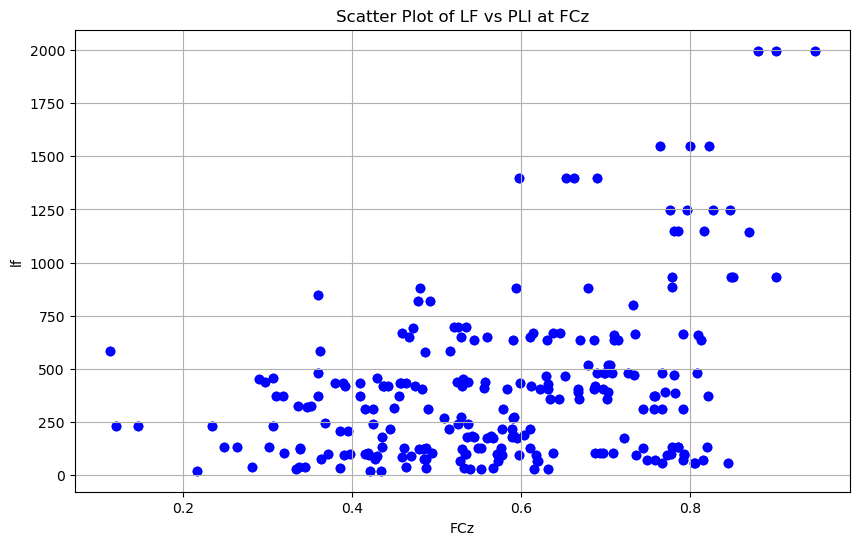

In [127]:
plt.figure(figsize=(10, 6))
plt.scatter(dataset[target2], dataset[target1], color='blue', alpha=0.7)
plt.title('Scatter Plot of LF vs PLI at FCz')
plt.xlabel(target2)
plt.ylabel(target1)
plt.grid(True)

plt.show()

# 2次で回帰してみるとどうなる？

In [94]:
import statsmodels.formula.api as smf

TypeError: sort_values() missing 1 required positional argument: 'by'

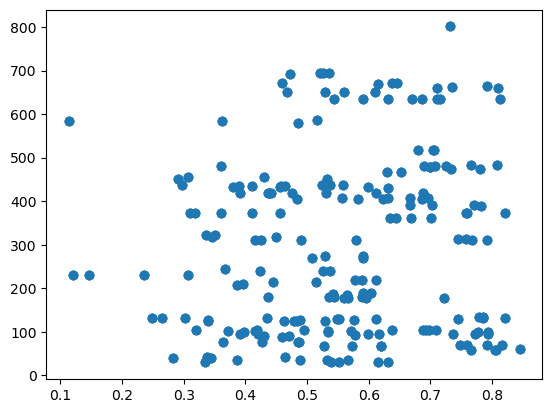

In [100]:
x = dataset[[target2]]
xlabel = target2

y = dataset[[target1]]
ylabel = target2

result2 = smf.ols(f'{target1} ~ {target2} + np.power({target2}, 2)', data=dataset).fit()

#graph
plt.scatter(x, y)
x = x.sort_values()
b0_2, b1_2, b2_2 = result2.params
plt.plot(x, b0_2 + b1_2*x + b2_2*x**2, 'g')
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.grid(True)
plt.savefig(f"{Constants.path_to_matlab_repository_folder}/csv/analysis_results/{Constants.folder_name}/image//{xlabel}_{ylabel}_2next.png")
plt.show()

In [97]:
dataset = dataset.replace([np.inf, -np.inf], np.nan).dropna()


In [98]:
x = dataset[[target2]]

y = dataset[[target1]]

係数: [[   0.          337.95841779 -179.82121184]]
切片: [170.54693011]
平均二乗誤差: 39729.577342135686
決定係数 (R^2スコア): 0.013341787806748107


/Users/miyakooti/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 23455 (\N{CJK UNIFIED IDEOGRAPH-5B9F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/miyakooti/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 28204 (\N{CJK UNIFIED IDEOGRAPH-6E2C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/miyakooti/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20516 (\N{CJK UNIFIED IDEOGRAPH-5024}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/miyakooti/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20104 (\N{CJK UNIFIED IDEOGRAPH-4E88}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


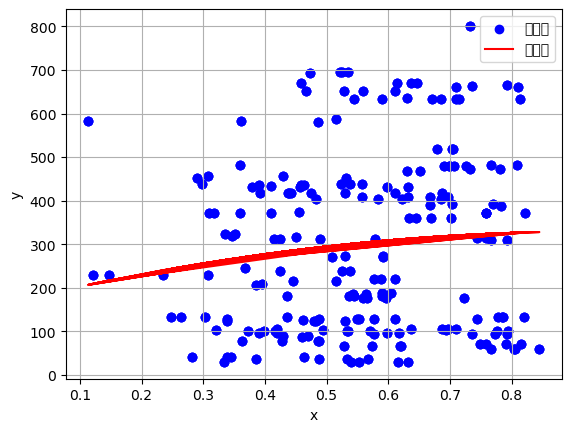

In [101]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



# 2次項を含む特徴量の作成

x = x.values
y = y.values

poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(x.reshape(-1, 1))

# モデルのフィッティング
model = LinearRegression()
model.fit(x_poly, y)

# 予測値の取得
y_pred = model.predict(x_poly)

# 結果の表示
print(f'係数: {model.coef_}')
print(f'切片: {model.intercept_}')
print(f'平均二乗誤差: {mean_squared_error(y, y_pred)}')
print(f'決定係数 (R^2スコア): {r2_score(y, y_pred)}')

# プロット
plt.scatter(x, y, color='blue', label='実測値')
plt.plot(x, y_pred, color='red', label='予測値')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()


In [11]:
hrdata = hp.get_data("/Users/miyakooti/repositories/arai_MATLAB_program/csv/0_kumakura/ECG/ECG_kumakura_rest.csv")

In [14]:
len(hrdata) / 500

312.718

In [16]:
# 120秒てこと
window = 120 * 500

In [18]:
hrdata1 = hrdata[120: window+121]
hrdata2 = hrdata[180: window+181]
hrdata3 = hrdata[240: window+241]

In [20]:
len(hrdata2) / 500

120.002

# PLIの方

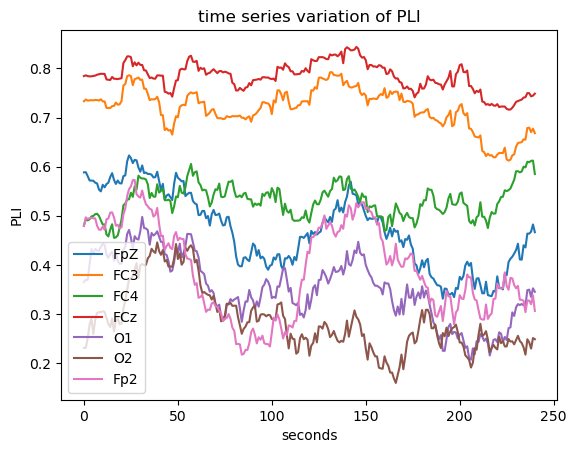

In [21]:
df = pd.read_csv(f"{pathes[0]}")

df.plot()
plt.title("time series variation of PLI")
plt.xlabel("seconds")
plt.ylabel("PLI")
plt.legend()

In [26]:
df.shape


(241, 7)

In [29]:
df

,FpZ,FC3,FC4,FCz,O1,O2,Fp2
0,0.588271,0.733079,0.480619,0.784402,0.364919,0.230928,0.479009
1,0.588623,0.736596,0.493215,0.785868,0.369536,0.230763,0.496515
2,0.580576,0.734451,0.490280,0.784314,0.369394,0.250613,0.492983
3,0.571799,0.734893,0.492865,0.783758,0.401797,0.278042,0.495149
4,0.571591,0.735323,0.498523,0.783888,0.432354,0.290451,0.495460
...,...,...,...,...,...,...,...
236,0.463556,0.678711,0.609937,0.749624,0.348419,0.248368,0.327614
237,0.463488,0.679336,0.608829,0.749583,0.349482,0.241949,0.327071
238,0.467720,0.670226,0.611692,0.743056,0.334490,0.229323,0.319745
239,0.482167,0.677185,0.612264,0.744550,0.352090,0.250804,0.337770


In [24]:
len(df) / 60
# 最初の1分間は完全に無視しているということ

4.016666666666667

In [31]:
data = {"lf": [], "FCz": []}
dataset = pd.DataFrame(data)

In [32]:
df

,lf,FCz


In [39]:
new_row = {"lf": 1, "FCz":1}
df = df.append(new_row, ignore_index=True)

/var/folders/4_/zl9w1kqn3wj4cv0147kh6bc40000gn/T/ipykernel_40560/3945444383.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row, ignore_index=True)


In [40]:
df

,lf,FCz
0,1.0,1.0
1,1.0,1.0
2,1.0,1.0
3,1.0,1.0
4,1.0,1.0
5,1.0,1.0


In [41]:
for _ in range(3):
    print("h9goe")

h9goe
h9goe
h9goe
